# Veri Seti Hikayesi
Vehicle Sales and Market Trends" veri seti, araç satış işlemleri ve pazar eğilimlerine dair kapsamlı bir bilgi sunmaktadır. Veri seti, çeşitli araçların satış işlemleriyle ilgili detayları içermektedir. Araçların markası, modeli, donanım seviyesi, gövde tipi, üretim yılı gibi temel bilgilerden, satış fiyatı, satış tarihi, kayıtlı olduğu eyalet ve satıcı bilgilerine kadar geniş bir yelpazede veri sağlamaktadır. Ayrıca araçların durumu, kilometre bilgisi, dış ve iç renk seçenekleri gibi faktörler de veri setinde yer almaktadır.



# Değişkenler

- **Yıl (Year):** Aracın üretildiği yıl.
- **Marka (Make):** Aracın markası (ör. Toyota, Ford).
- **Model (Model):** Aracın modeli (ör. Corolla, F-150).
- **Donanım (Trim):** Aracın donanım seviyesi.
- **Gövde Tipi (Body Type):** Aracın gövde tipi (ör. sedan, SUV).
- **Şanzıman Tipi (Transmission Type):** Aracın şanzıman tipi (otomatik, manuel).
- **VIN (Vehicle Identification Number):** Aracın araç kimlik numarası (VIN).
- **Kayıtlı Eyalet (State of Registration):** Aracın kayıtlı olduğu eyalet.
- **Durum Puanı (Condition Rating):** Aracın durumu hakkında puanlama.
- **Kilometre (Odometer Reading):** Aracın kilometre bilgisi.
- **Dış Renk (Exterior Color):** Aracın dış rengi.
- **İç Renk (Interior Color):** Aracın iç rengi.
- **Satıcı Bilgileri (Seller Information):** Aracın satışını yapan satıcıya ait bilgiler.
- **Manheim Pazar Raporu (MMR) Değeri (Manheim Market Report Value):** Aracın piyasa değeri (Manheim tarafından belirlenen değer).
- **Satış Fiyatı (Selling Price):** Aracın satıldığı fiyat.
- **Satış Tarihi (Sale Date):** Aracın satıldığı tarih.
  



# Kütüphanelerin Yüklenmesi

In [53]:
############ LIBRARIES ############

# BASE
import numpy as np  # Sayısal işlemler ve diziler üzerinde matematiksel hesaplamalar için kullanılır.
import pandas as pd  # Veri işleme ve veri çerçeveleri (DataFrame) üzerinde çalışmak için kullanılan güçlü bir kütüphane.
import seaborn as sns  # Veri görselleştirme kütüphanesi, özellikle istatistiksel grafikler oluşturmak için kullanılır.
from matplotlib import pyplot as plt  # Grafik çizimi için kullanılan temel kütüphanelerden biridir.

# DATA PREPROCESSING
from sklearn import preprocessing  # Veri ölçekleme, etiket kodlama gibi ön işleme işlemleri için kullanılır.
from sklearn.neighbors import LocalOutlierFactor  # Aykırı değer tespiti için kullanılan bir yöntem.


# MODELING
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet  # Doğrusal regresyon ve varyasyonları (Ridge, Lasso, ElasticNet) için kullanılır.
from sklearn.metrics import mean_squared_error  # Modelin başarısını ölçmek için hata metriği (Mean Squared Error).
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  # Veri setini eğitim ve test olarak bölme, modelin parametrelerini seçme ve çapraz doğrulama işlemleri.
from sklearn.neighbors import KNeighborsRegressor  # K En Yakın Komşu (KNN) regresyon modeli.
from sklearn.svm import SVR  # Destek Vektör Regresyonu (Support Vector Regression).
from sklearn.tree import DecisionTreeRegressor  # Karar ağacı ile regresyon.
from sklearn.exceptions import ConvergenceWarning  # Model eğitim sürecinde uyarılar için kullanılır.

import xgboost  # XGBoost modeli için ana kütüphane.
from xgboost import XGBRegressor  # XGBoost ile regresyon modeli.
from lightgbm import LGBMRegressor  # LightGBM regresyon modeli.
from sklearn.neural_network import MLPRegressor  # Çok katmanlı algılayıcı (MLP) sinir ağları ile regresyon.
from sklearn.ensemble import RandomForestRegressor  # Rastgele orman (Random Forest) regresyon modeli.
from sklearn.ensemble import GradientBoostingRegressor  # Gradyan artırma (Gradient Boosting) regresyon modeli.


# MODEL TUNING
from sklearn.model_selection import GridSearchCV  # Model parametrelerini seçmek için grid araması (Grid Search).
from sklearn.model_selection import cross_val_score  # Çapraz doğrulama ile model değerlendirme.


# WARNINGS
import warnings  # Uyarıları yönetmek için kullanılan Python kütüphanesi.
warnings.filterwarnings("ignore", category=DeprecationWarning)  # DeprecationWarning'leri görmezden gelir.
warnings.filterwarnings("ignore", category=FutureWarning)  # FutureWarning'leri görmezden gelir.
pd.set_option('display.max_columns', None)  # Pandas'ta tüm sütunların görünmesi için ayar.
pd.set_option('display.width', None)  # Satır genişliğini sınırsız yapar.
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # Sayıların ondalıklı olarak gösterilmesi için format belirler.


# Veriye Genel Bakış

In [54]:
df = pd.read_csv("car_prices.csv")
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.000,16639.000,white,black,kia motors america inc,20500.000,21500.000,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.000,9393.000,white,beige,kia motors america inc,20800.000,21500.000,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.000,1331.000,gray,black,financial services remarketing (lease),31900.000,30000.000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.000,14282.000,white,black,volvo na rep/world omni,27500.000,27750.000,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.000,2641.000,gray,black,financial services remarketing (lease),66000.000,67000.000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [55]:
# Genel bakış için bir fonksiyon yazalım. 
def checkDf(dataframe, head = 8):
  print("######################## Shape ########################")
  print(dataframe.shape)
  print("\n######################## Types ########################")
  print(dataframe.dtypes)
  print("\n######################## Tail ########################")
  print(dataframe.tail(head))
  print("\n######################## Head ########################")
  print(dataframe.head(head))
  print("\n######################## Null Analysis ########################")
  print(dataframe.isnull().sum())
  print("\n######################## Quantiles ########################")
  print(dataframe.describe([0,0.05, 0.50, 0.95, 0.99, 1]).T)  
  print("\n######################## Unique Values ########################")
  print(dataframe.nunique())

In [56]:
# Oluşturduğumuz fonksiyonu çalıştıralım ve veriye genel bir bakış atalım.
checkDf(df)

######################## Shape ########################
(558837, 16)

######################## Types ########################
year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

######################## Tail ########################
        year     make     model         trim       body transmission  \
558829  2012  Hyundai   Elantra      Limited      Sedan          NaN   
558830  2012   Nissan    Sentra       2.0 SR      Sedan          NaN   
558831  2011      BMW  5 Series         528i      Sedan    automatic   
558832  2015      Kia      K900       Luxury      Sedan          NaN   
558833  2012      Ram      2500  Power Wagon   Crew Cab    a

### Tekrar eden değişken sayısını kontrol edelim.

In [57]:
df.duplicated().sum()

np.int64(0)

### Tekrar eden veri yok.

In [58]:
missing_percentage = (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100
formatted_percentage = round(missing_percentage, 2)
f"Verideki eksik veri sayısı yüzdelik olarak % {formatted_percentage}'dir."

"Verideki eksik veri sayısı yüzdelik olarak % 1.38'dir."

### Tüm veriler içerisinde %1.38'lik verinin eksik olması iyi bir veriye sahip olduğumuzu gösterir. 

# İlk gözlemlerim: 
Odometer, MMR ve sellingprice sütunlarında özellikle çok yüksek ve çok düşük aykırı değerler mevcut. Örneğin, 999,999 km, 182,000 dolar pazar değeri ve 230,000 dolar satış fiyatı gibi değerler veri kümesindeki genel dağılıma kıyasla aykırı gözükmektedir. 

Bunu %99 ve max değeri arasındaki aşırı farktan anlayabiliriz.

Göz ardı edilemeyecek kadar da eksik verilerimiz var ama fazla da eksik değil.



# Keşifsel Veri Analizi (EDA - Exploratory Data Analysis)

### Numerik ve Kategorik Değişkenlerin Yakalanması

In [59]:
def grabColNames(dataframe, catTh=10, carTh=1000):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        catTh: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        carTh: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        catCols: list
                Kategorik değişken listesi
        numCols: list
                Numerik değişken listesi
        catButCar: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grabColNames(df))


    Notes
    ------
        catCols + numCols + catButCar = toplam değişken sayısı
        numButCat catCols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: catCols + numCols + catButCar = değişken sayısı

    """

    # catCols, catButCar
    catCols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    numButCat = [col for col in dataframe.columns if dataframe[col].nunique() < catTh and
                 dataframe[col].dtypes != "O"]
    catButCar = [col for col in dataframe.columns if dataframe[col].nunique() > carTh and
                 dataframe[col].dtypes == "O"]
    catCols = catCols + numButCat
    catCols = [col for col in catCols if col not in catButCar]

    # numCols
    numCols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    numCols = [col for col in numCols if col not in numButCat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'catCols: {len(catCols)}')
    print(f'numCols: {len(numCols)}')
    print(f'catButCar: {len(catButCar)}')
    print(f'numButCat: {len(numButCat)}')
    return catCols, numCols, catButCar


catCols, numCols, catButCar = grabColNames(df)

Observations: 558837
Variables: 16
catCols: 7
numCols: 5
catButCar: 4
numButCat: 0


In [60]:
f"Kategorik değişklerimiz: {catCols}"

"Kategorik değişklerimiz: ['make', 'model', 'body', 'transmission', 'state', 'color', 'interior']"

In [61]:
f"Numerik değişkenlerimiz: {numCols}"

"Numerik değişkenlerimiz: ['year', 'condition', 'odometer', 'mmr', 'sellingprice']"

In [62]:
f"Kategorik görünümlü kardinal değişkenlerimiz: {catButCar}"

"Kategorik görünümlü kardinal değişkenlerimiz: ['trim', 'vin', 'seller', 'saledate']"

### Değişkenlerimizin türünü geçici olarak belirledik. Ancak buradaki değişkenlerimizin tam türünü anlayabilmek için sektör bilgisi gerekli olduğunu düşünüyorum.

## Numerik ve Kategorik Değişkenlerin Analizi

             make  Ratio
make                    
Ford        93554 16.741
Chevrolet   60197 10.772
Nissan      53946  9.653
Toyota      39871  7.135
Dodge       30710  5.495
...           ...    ...
ford tk         1  0.000
chev truck      1  0.000
airstream       1  0.000
dot             1  0.000
Lotus           1  0.000

[96 rows x 2 columns]
Missing Count: 10301
Missing Ratio: 1.84%
##########################################


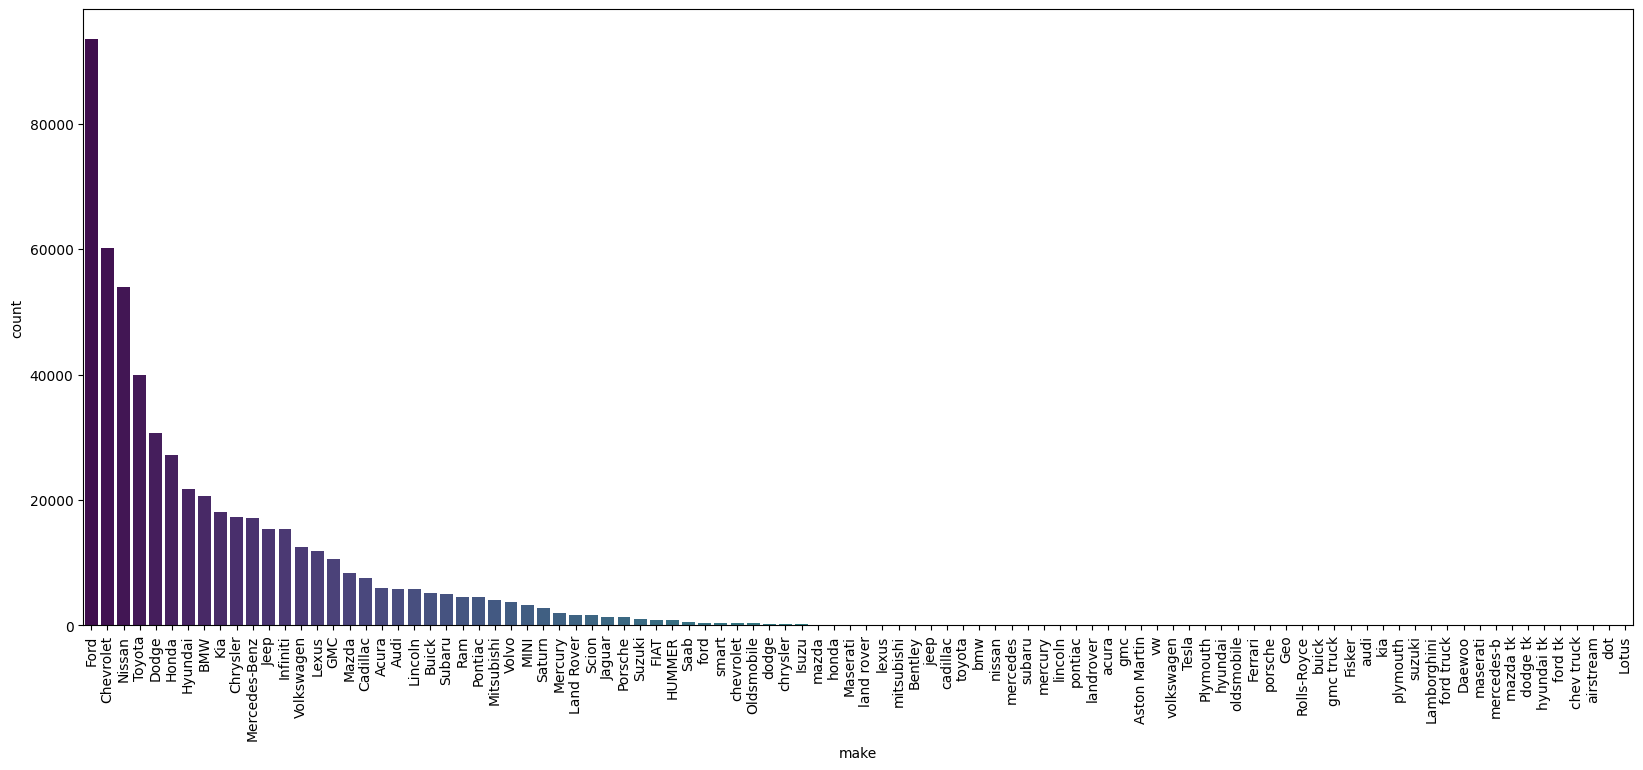

            model  Ratio
model                   
Altima      19349  3.462
F-150       14479  2.591
Fusion      12946  2.317
Camry       12545  2.245
Escape      11861  2.122
...           ...    ...
Q3              1  0.000
F-250           1  0.000
360             1  0.000
TLX             1  0.000
458 Italia      1  0.000

[973 rows x 2 columns]
Missing Count: 10399
Missing Ratio: 1.86%
##########################################
               body  Ratio
body                      
Sedan        199437 35.688
SUV          119292 21.346
sedan         41906  7.499
suv           24552  4.393
Hatchback     21380  3.826
...             ...    ...
CTS-V Wagon       1  0.000
Ram Van           1  0.000
g37 coupe         1  0.000
cab plus 4        1  0.000
cts wagon         1  0.000

[87 rows x 2 columns]
Missing Count: 13195
Missing Ratio: 2.36%
##########################################


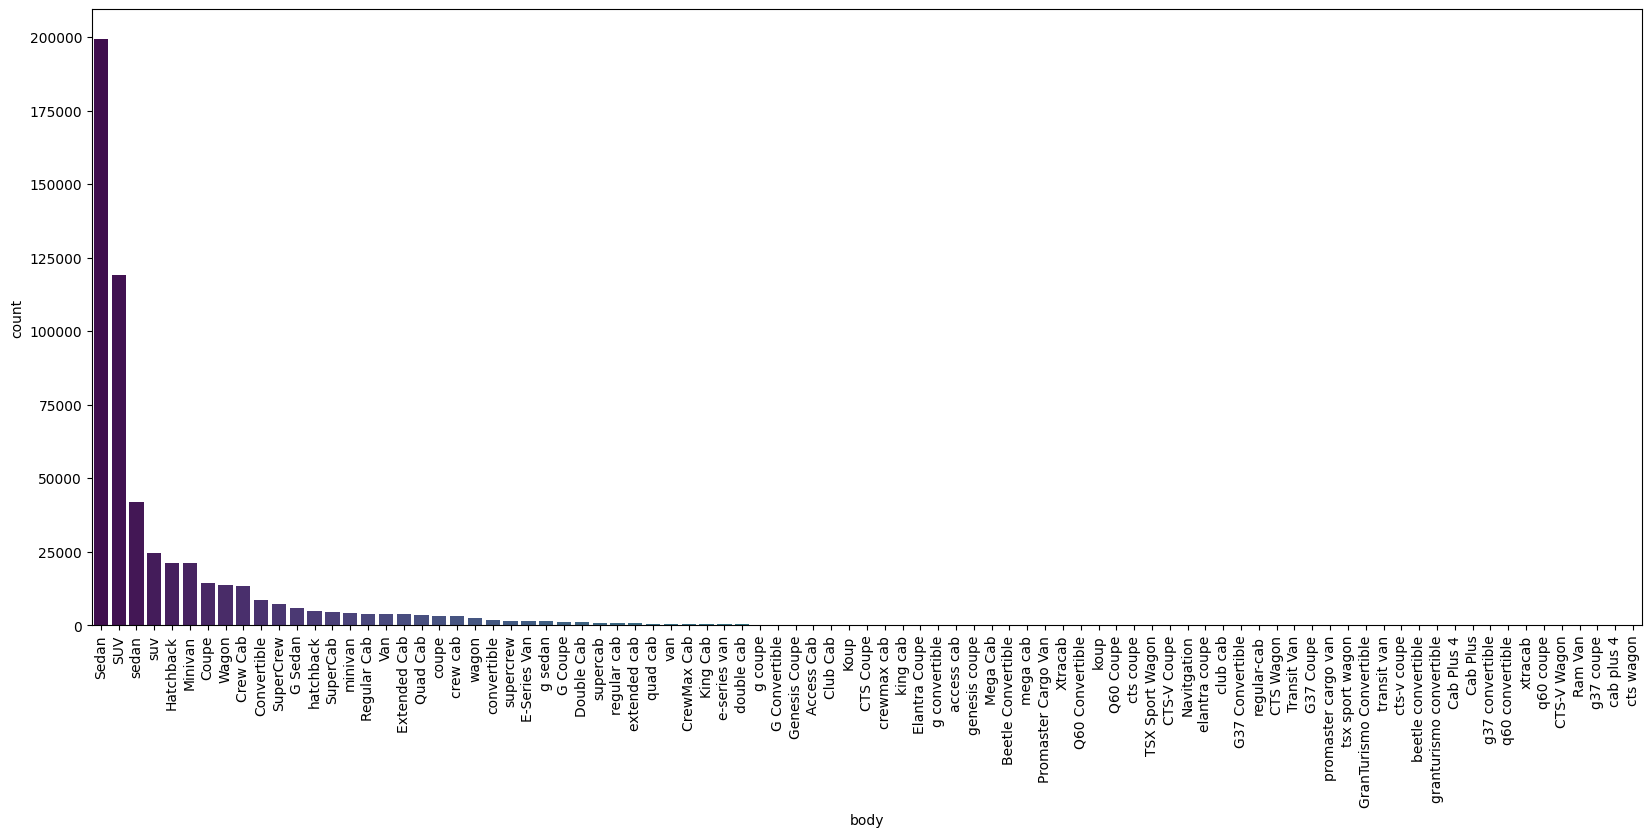

              transmission  Ratio
transmission                     
automatic           475915 85.162
manual               17544  3.139
sedan                   15  0.003
Sedan                   11  0.002
Missing Count: 65352
Missing Ratio: 11.69%
##########################################


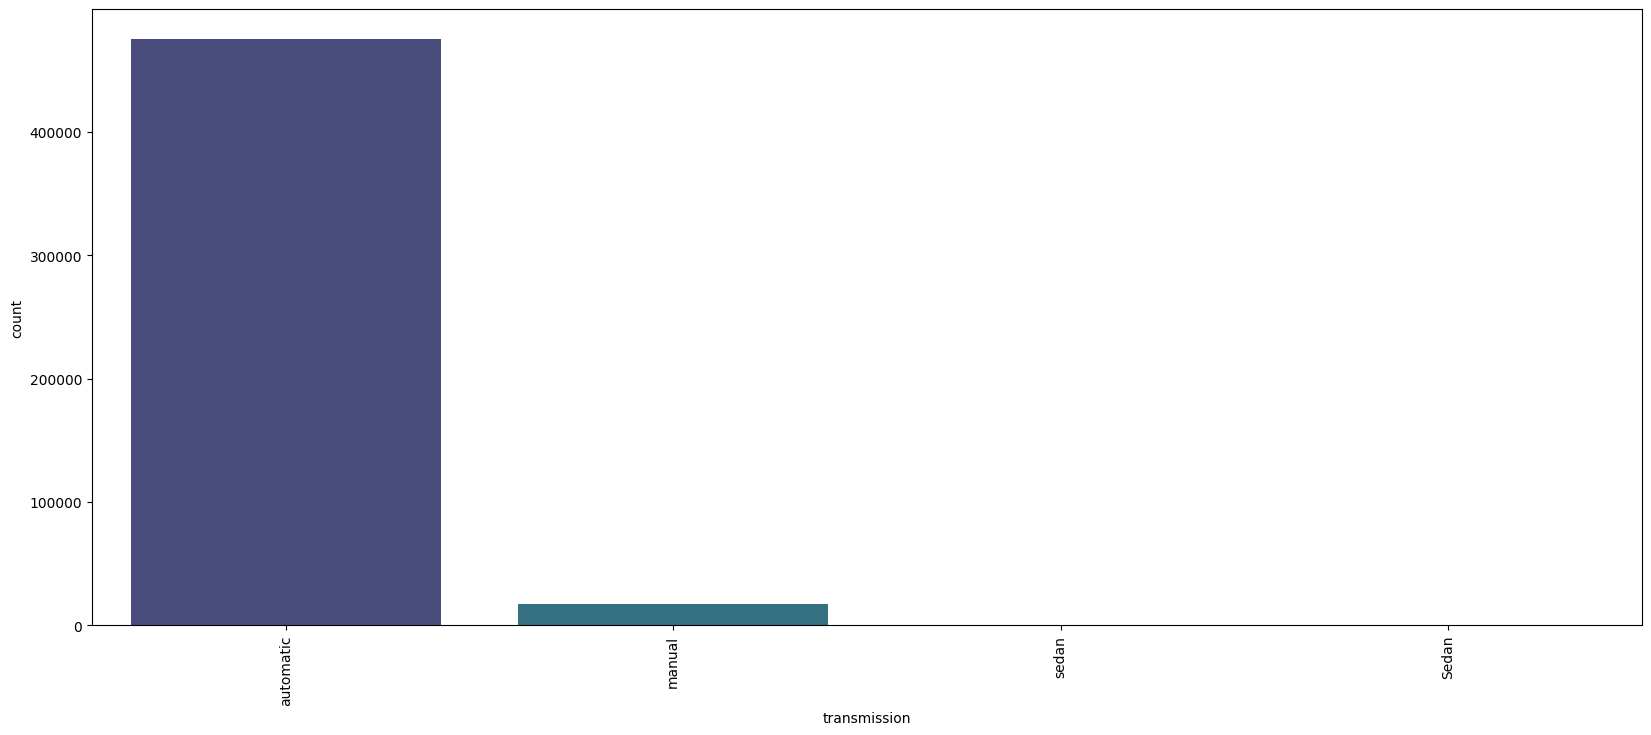

                   state  Ratio
state                          
fl                 82945 14.842
ca                 73148 13.089
pa                 53907  9.646
tx                 45913  8.216
ga                 34750  6.218
...                  ...    ...
3vwd17aj4fm236636      1  0.000
3vwd17aj5fm225953      1  0.000
3vwd17aj7fm326640      1  0.000
3vwd17aj8fm239622      1  0.000
3vwd17aj2fm261566      1  0.000

[64 rows x 2 columns]
Missing Count: 0
Missing Ratio: 0.00%
##########################################


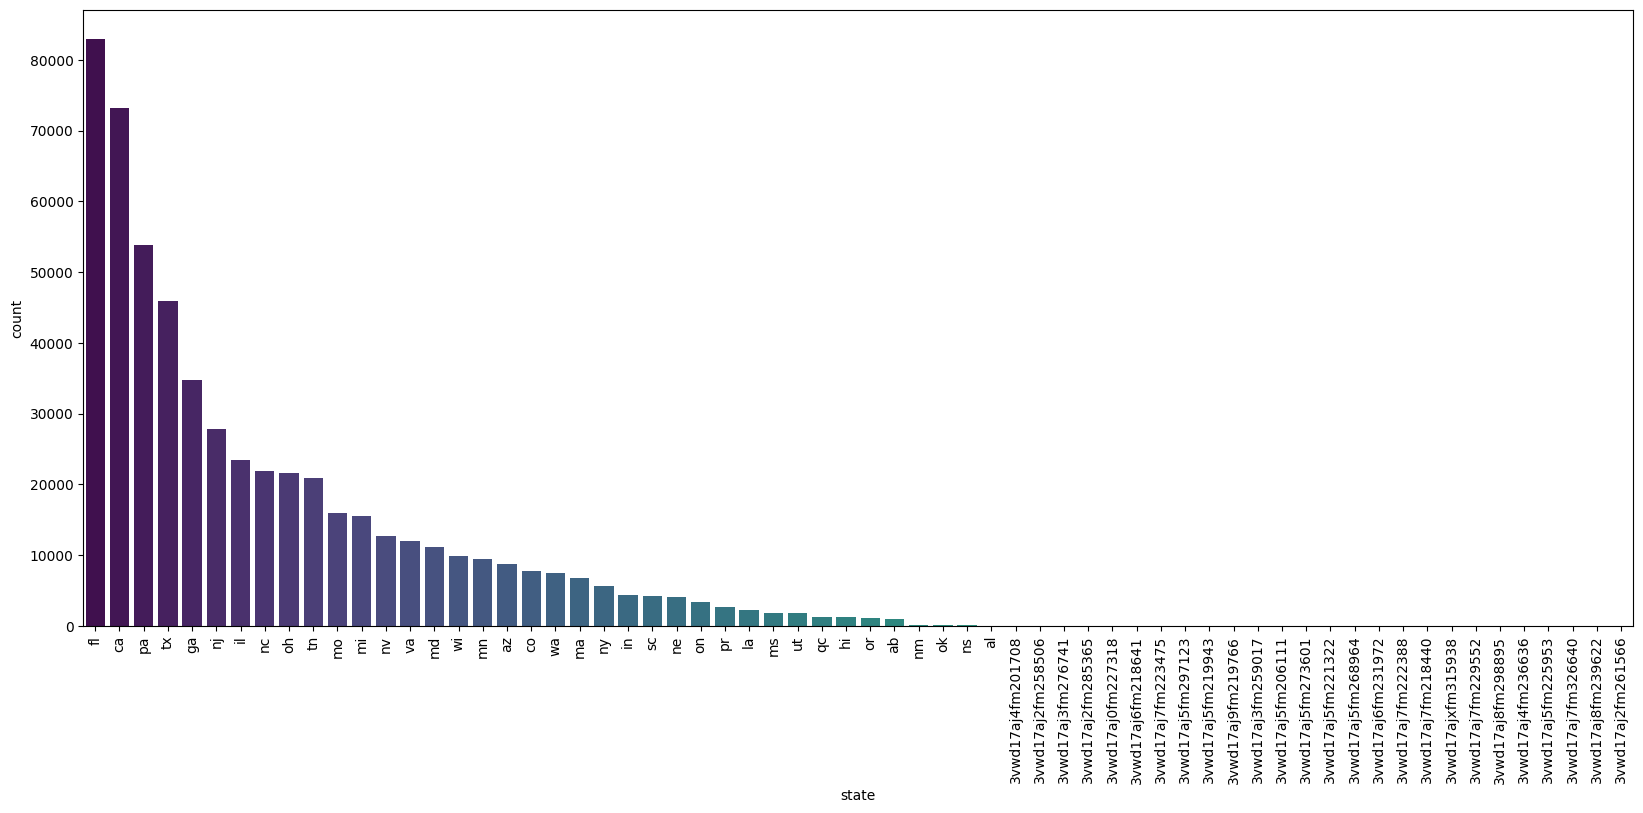

            color  Ratio
color                   
black      110970 19.857
white      106673 19.088
silver      83389 14.922
gray        82857 14.827
blue        51139  9.151
red         43569  7.796
—           24685  4.417
green       11382  2.037
gold        11342  2.030
beige        9222  1.650
burgundy     8972  1.605
brown        6717  1.202
orange       2078  0.372
purple       1561  0.279
off-white    1449  0.259
yellow       1285  0.230
charcoal      479  0.086
turquoise     236  0.042
pink           42  0.008
lime           15  0.003
4802            1  0.000
9410            1  0.000
1167            1  0.000
2172            1  0.000
14872           1  0.000
12655           1  0.000
15719           1  0.000
6388            1  0.000
16633           1  0.000
11034           1  0.000
2711            1  0.000
6864            1  0.000
339             1  0.000
18384           1  0.000
9887            1  0.000
9837            1  0.000
20379           1  0.000
20627           1  0.000


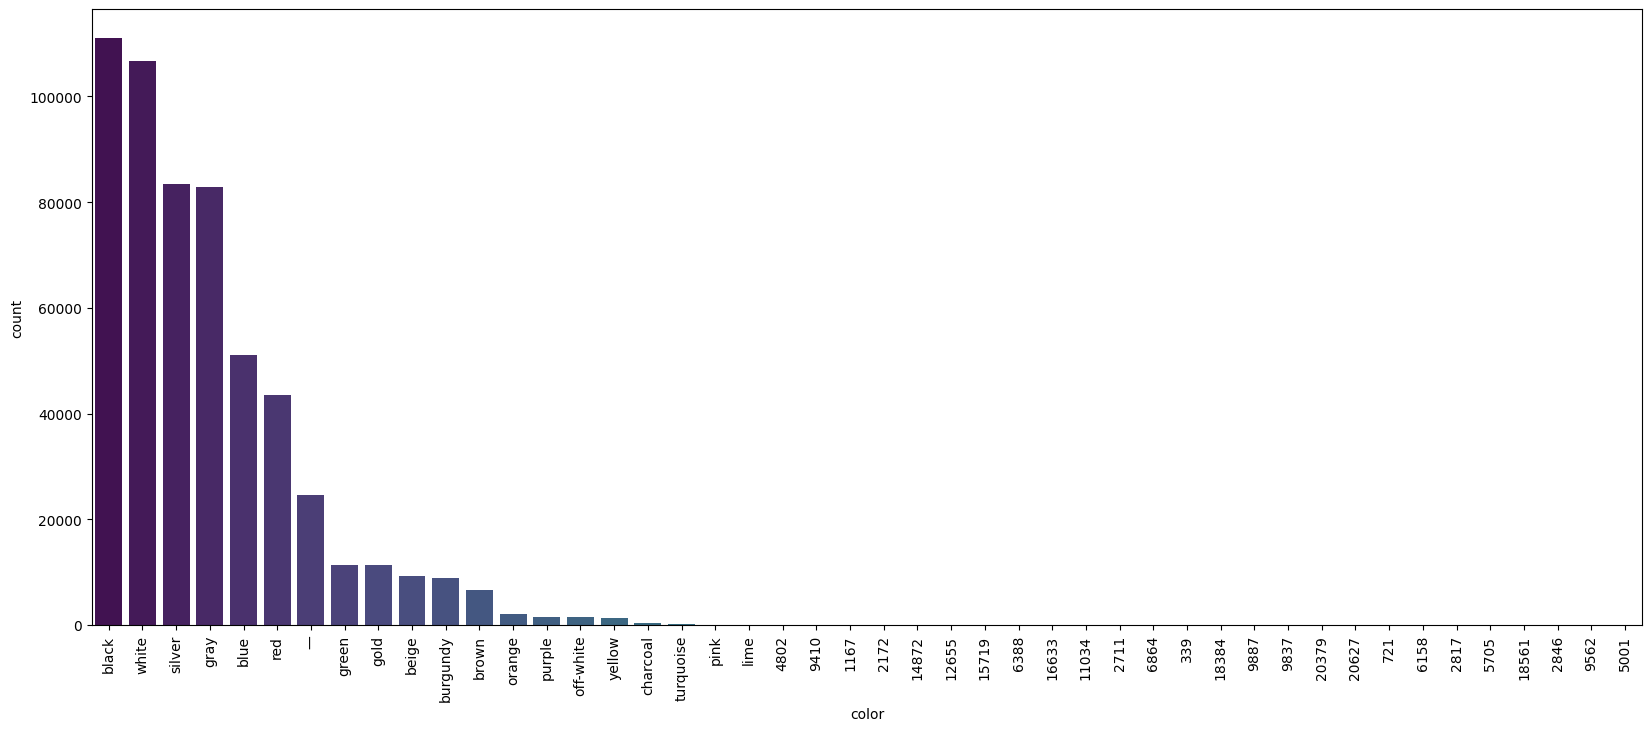

           interior  Ratio
interior                  
black        244329 43.721
gray         178581 31.956
beige         59758 10.693
tan           44093  7.890
—             17077  3.056
brown          8640  1.546
red            1363  0.244
blue           1143  0.205
silver         1104  0.198
off-white       480  0.086
purple          339  0.061
gold            324  0.058
white           256  0.046
green           245  0.044
burgundy        191  0.034
orange          145  0.026
yellow           20  0.004
Missing Count: 749
Missing Ratio: 0.13%
##########################################


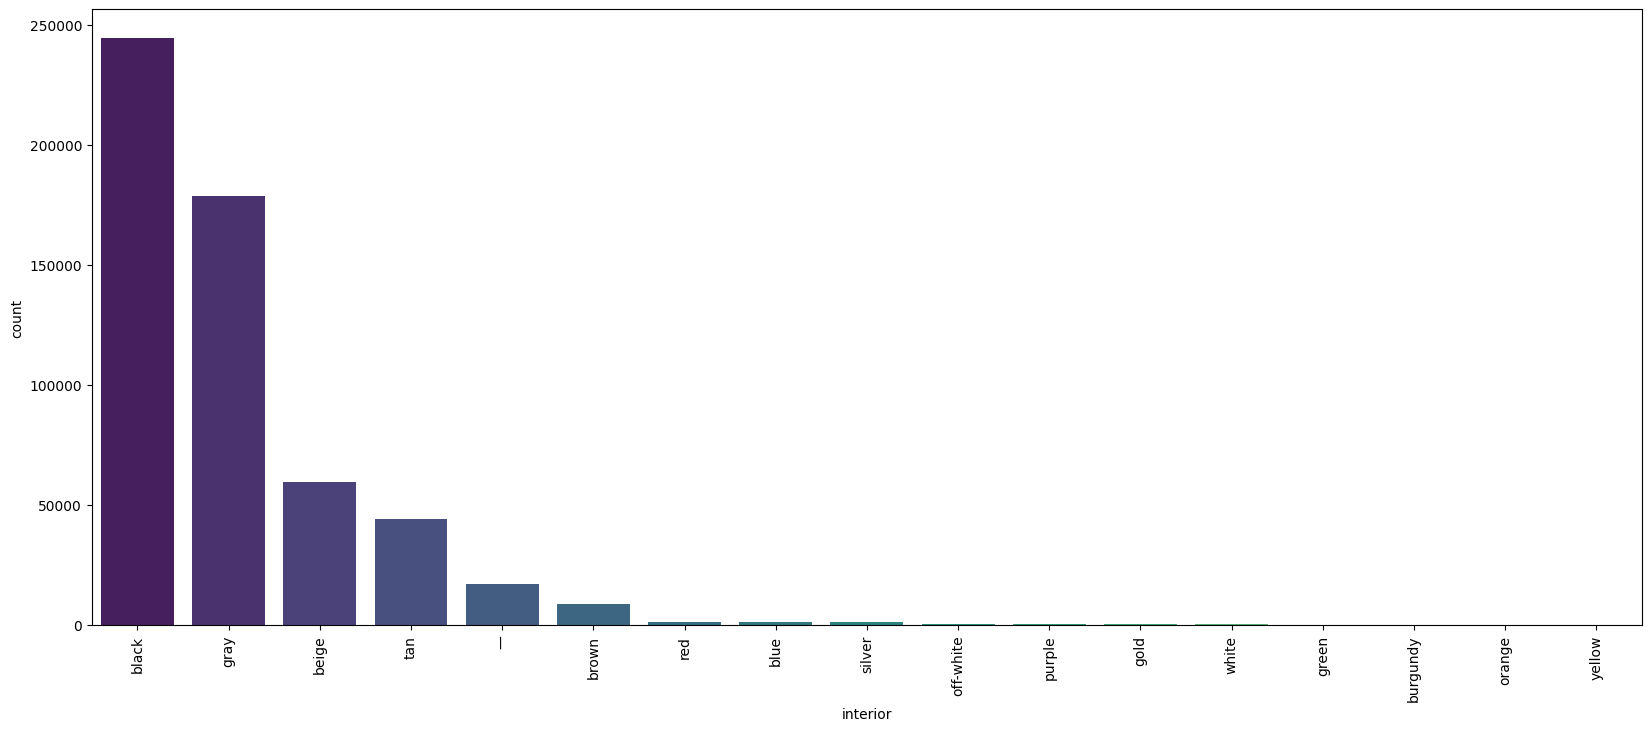

In [63]:
# Veri setimizdeki kategorik değişkenlerin sınıf sayısını ve oranlarını yazdırıyoruz

def catSummary(dataframe, colName, plot=False):
    # Kategorik verilerin değerlerini ve oranlarını yazdır
    counts = dataframe[colName].value_counts()
    ratio = 100 * counts / len(dataframe)
    
    # Eksik veri sayısı ve oranı
    missing_count = dataframe[colName].isnull().sum()
    missing_ratio = 100 * missing_count / len(dataframe)
    
    summary_df = pd.DataFrame({colName: counts, "Ratio": ratio})
    print(summary_df)
    print(f"Missing Count: {missing_count}")
    print(f"Missing Ratio: {missing_ratio:.2f}%")
    print("##########################################")

    if plot:
        plt.figure(figsize=(20, 8))
        # Kategorileri azalan sıralamada düzenle
        ax = sns.countplot(x=dataframe[colName], data=dataframe, order=counts.index, palette="viridis")
        plt.xticks(rotation=90)  # Etiketleri 90 derece döndür
        plt.show(block=True)

# Dataframe ve kategorik sütunlar tanımlı olduğunu varsayıyoruz
for col in catCols:
    if df[col].dtypes == "bool":
        print(col)
    elif df[col].nunique() < 100:
        catSummary(df, col, True)
    else:
        catSummary(df, col, False)


## Grafikleri yorumlayalım:
### Make 
- Ford en yüksek sayıda araca sahip ve açık ara önde. Yaklaşık 90.000'den fazla bir sayıya sahip.
- Chevrolet ikinci sırada, Ford'a göre daha düşük olmasına rağmen yine de oldukça yüksek, yaklaşık 60.000 civarında.
- Toyota, Nissan ve Dodge da oldukça yüksek sayılarda araca sahip diğer markalar arasında yer alıyor.
- Lexus, Mazda, Cadillac gibi markalar orta seviyede araç sayısına sahipler.
- Daha az bilinen veya daha az tercih edilen markalar ise grafiğin sağ tarafında yer almakta ve çok daha düşük sayılarda. Örneğin, Ferrari, Rolls-Royce, Lotus gibi markalar çok az sayıda görünüyor.

Genel olarak, grafik bize yaygın olarak tercih edilen markalar ile daha nadir olan markalar arasındaki farkı net bir şekilde göstermektedir. Ford ve Chevrolet gibi markalar piyasada oldukça hakimken, Ferrari gibi lüks markaların daha az sayıda olduğu görülüyor.

### Body 

- Sedan açık ara en yüksek sayıda olan gövde tipi. Yaklaşık 200.000'in üzerinde araç sedan gövde tipine sahip.
- SUV gövde tipi ikinci sırada, yaklaşık 125.000 civarında araç bu gövde tipinde.
- Sedan ve SUV tiplerinin ardından Hatchback, Minivan, Wagon gibi daha küçük araç kategorileri geliyor, ancak bunların sayısı çok daha düşük.
- Diğer gövde tipleri (örneğin, Convertible, Crew Cab, SuperCrew) sayıca çok daha az. Grafiğin sağ tarafındaki gövde tipleri ise neredeyse sıfıra yakın sayılarda.

Genel olarak, piyasada en yaygın kullanılan araçların sedan ve SUV tipi olduğu görülüyor. Diğer gövde tipleri, özellikle daha spesifik olanlar (örneğin Quad Cab, Extended Cab), çok daha az sayıda tercih ediliyor.

### Transmission 

- Otomatik vites açık ara en yüksek sayıda tercih edilen vites türü. Yaklaşık 500.000 araç otomatik vitese sahip. 
- Manuel vites türüne sahip araçları 10.000-15.000 civarında. 
- Sedan olarak girilen değerler yanlış sanırım. Sayısı çok çok az bunlar aykırı değer olarak ele alabiliriz. 

Genel olarak, piyasada en yaygın kullanılan araçların otomatik şanzımana sahip olduğu görülüyor.

### State

- En çok araç satılan eyalet Florida. Satılan araç sayısı 80.000'in üzerinde. 
- İkinci sırada Kaliforniya takip ediyor. Satılan araç sayısı 70.000'in üzerinde.
- Diğer en çok araç satılan eyaletler Pensilvanya, Teksas ve Georgia vb. gibi eyaletler takip ediyor.

Genel olarak, bu eyaletlerin nüfus yoğunluğu, ekonomik durumu ve yerel otomobil tercihleri, araç satışlarında önemli bir rol oynuyor.

### Color 

- En çok satan dış araç rengi Siyah. Satılan siyah araç sayısı 100.000'in üzerinde. 
- İkinci sırada en çok satan dış araç rengini Beyaz takip ediyor. Satılan araç sayısı aynı şekilde 100.000'in üzerinde.
- Diğer en çok satan dış araç renkleri Gümüş, Gri ve Mavi vb. araç renkleri takip ediyor.

Genel olarak, nötr tonlar olan siyah, beyaz, gri ve gümüş gibi renkler en çok satılanlar arasında.

### Interior 

- En çok satan iç araç rengi Siyah. Satılan siyah araç sayısı 200.000'in üzerinde. 
- İkinci sırada en çok satan iç araç rengini Gri takip ediyor. Satılan araç sayısı 150.000'in üzerinde.
- Diğer en çok satan iç araç renkleri Bej, Krem ve - olarak isimlendirilmiş araç rengi vb. araç renkleri takip ediyor.

Genel olarak, açık tondaki renkler araç içinde en çok satılanlar arasında.

count   558837.000
mean      2010.039
std          3.967
min       1982.000
1%        1998.000
5%        2002.000
10%       2004.000
20%       2007.000
30%       2008.000
40%       2011.000
50%       2012.000
60%       2012.000
70%       2013.000
80%       2013.000
90%       2014.000
95%       2014.000
99%       2015.000
100%      2015.000
max       2015.000
Name: year, dtype: float64
Missing Count: 0
Missing Ratio: 0.00%
##########################################


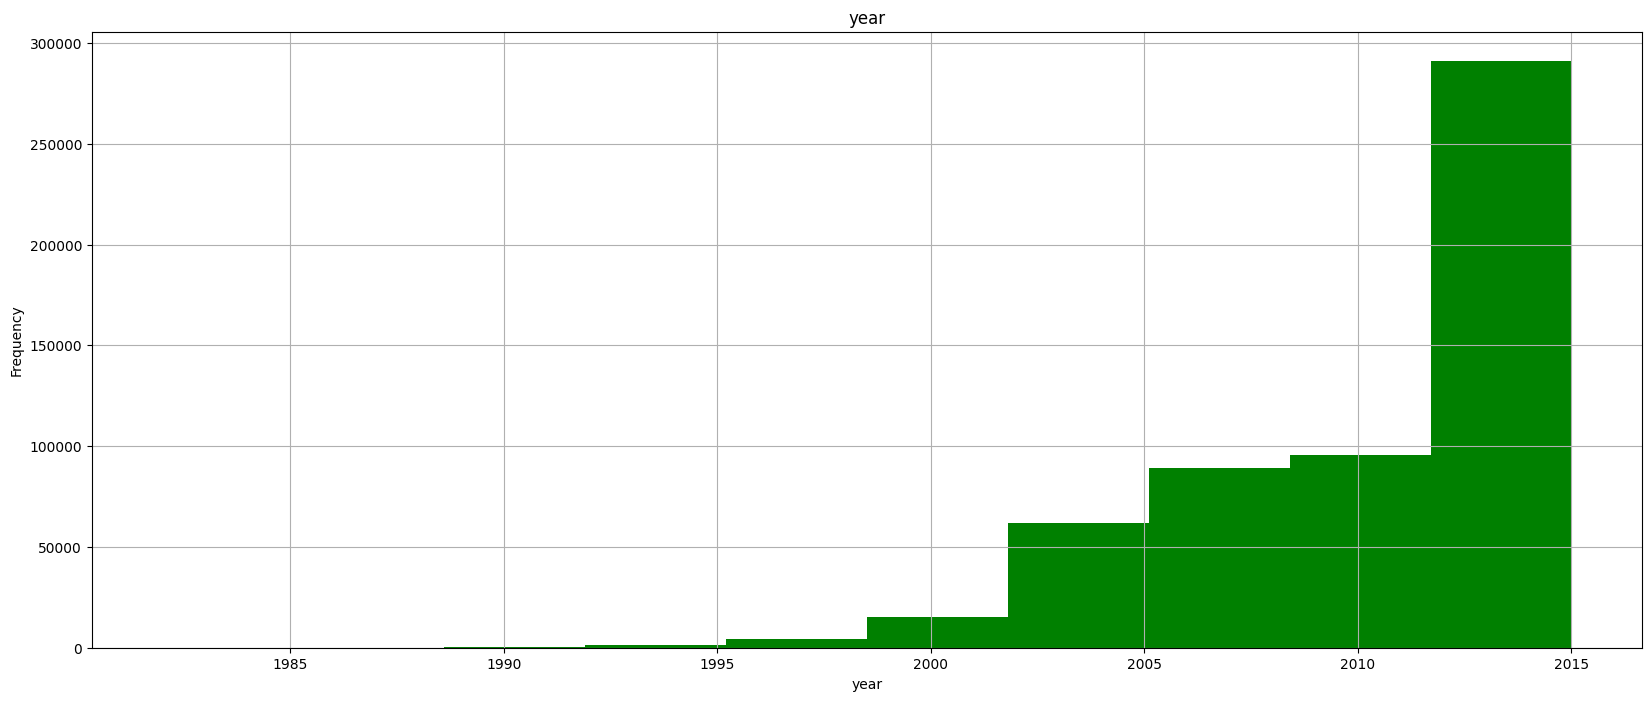

count   547017.000
mean        30.672
std         13.403
min          1.000
1%           1.000
5%           2.000
10%          4.000
20%         19.000
30%         26.000
40%         29.000
50%         35.000
60%         37.000
70%         39.000
80%         43.000
90%         45.000
95%         47.000
99%         49.000
100%        49.000
max         49.000
Name: condition, dtype: float64
Missing Count: 11820
Missing Ratio: 2.12%
##########################################


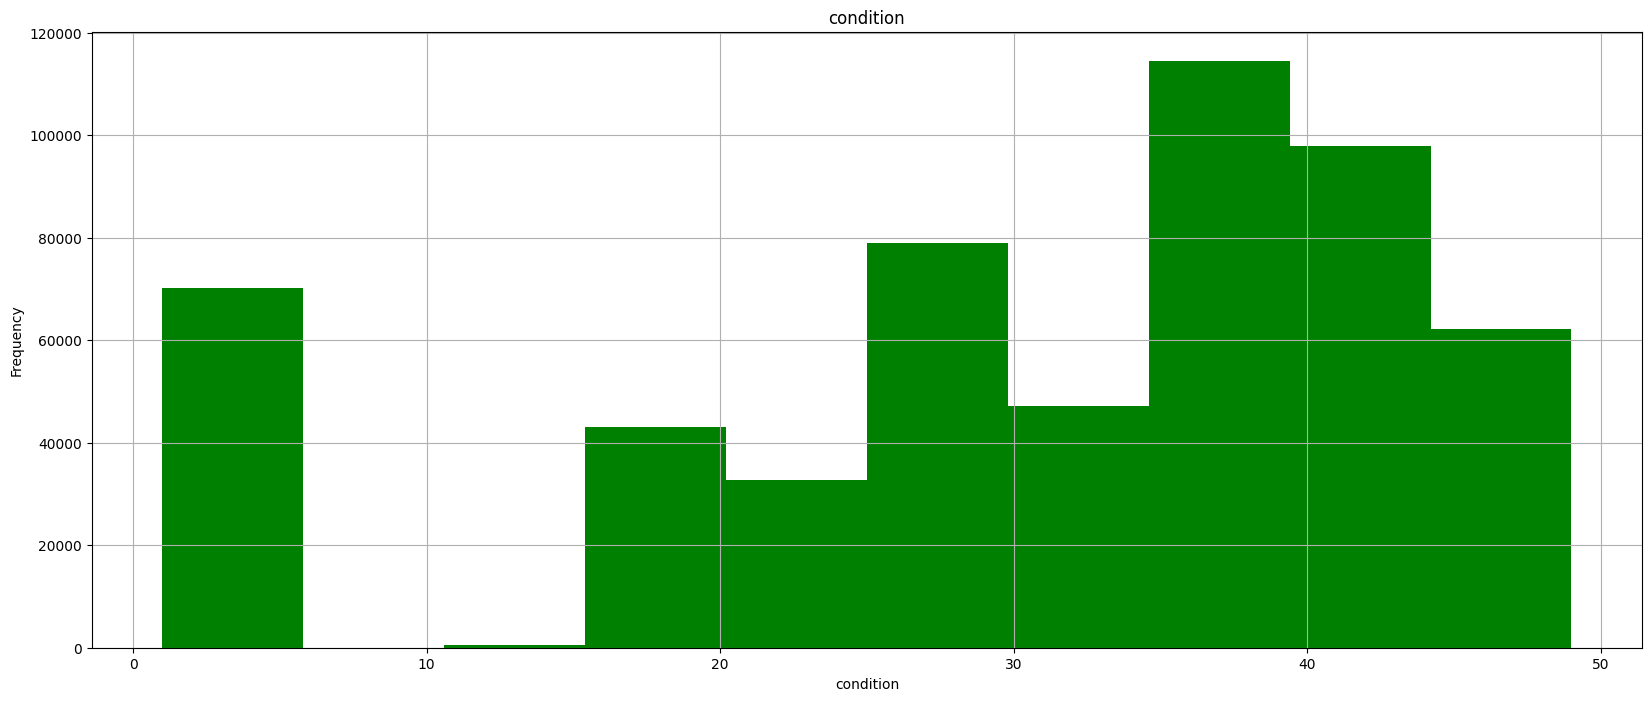

count   558743.000
mean     68320.018
std      53398.543
min          1.000
1%        3292.840
5%       10512.000
10%      15668.200
20%      23986.000
30%      32355.000
40%      40266.000
50%      52254.000
60%      67111.200
70%      88603.400
80%     111031.000
90%     142759.800
95%     170056.900
99%     226668.800
100%    999999.000
max     999999.000
Name: odometer, dtype: float64
Missing Count: 94
Missing Ratio: 0.02%
##########################################


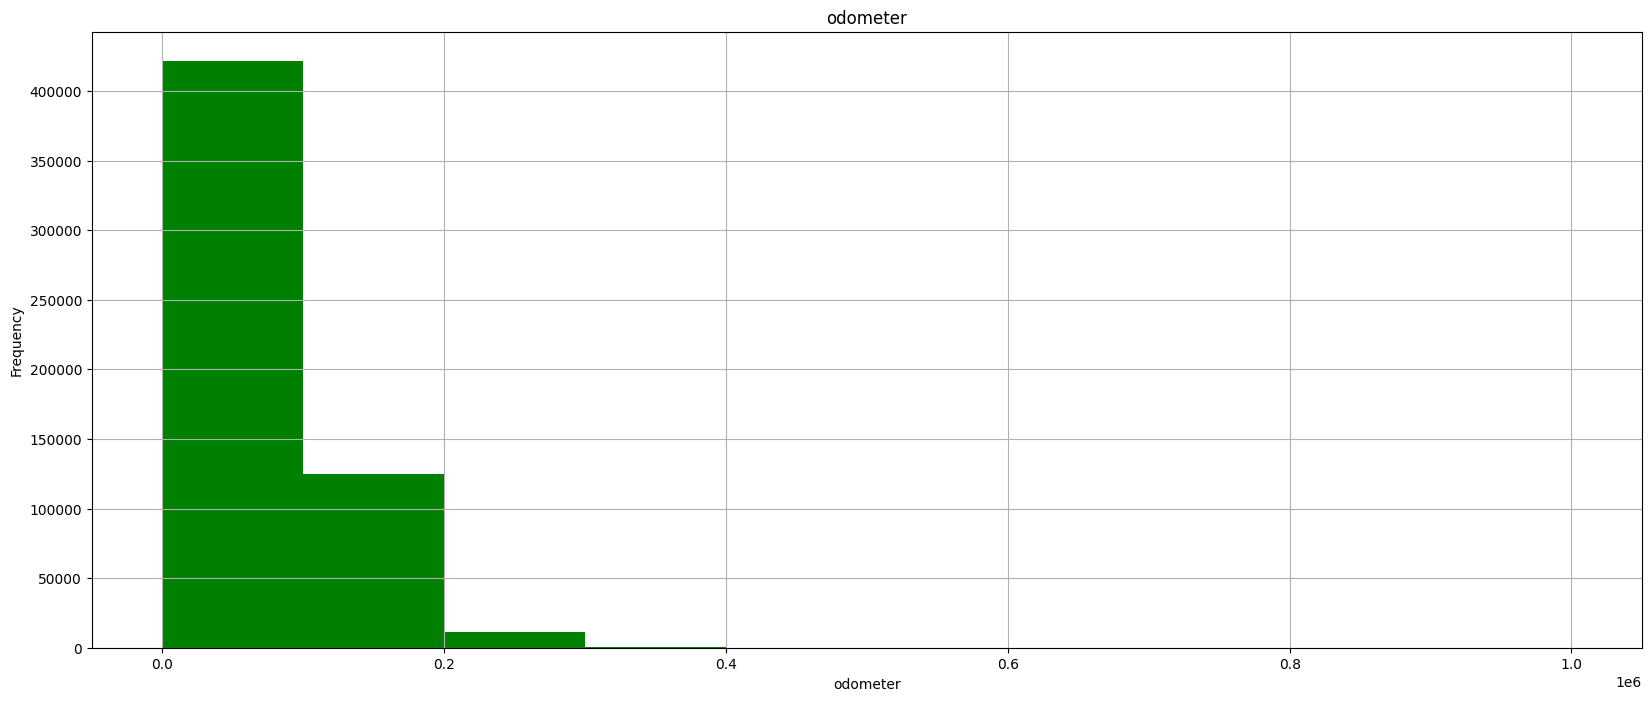

count   558799.000
mean     13769.377
std       9679.967
min         25.000
1%         750.000
5%        1800.000
10%       3050.000
20%       5650.000
30%       8450.000
40%      10550.000
50%      12250.000
60%      14150.000
70%      16750.000
80%      20200.000
90%      25500.000
95%      30600.000
99%      44900.000
100%    182000.000
max     182000.000
Name: mmr, dtype: float64
Missing Count: 38
Missing Ratio: 0.01%
##########################################


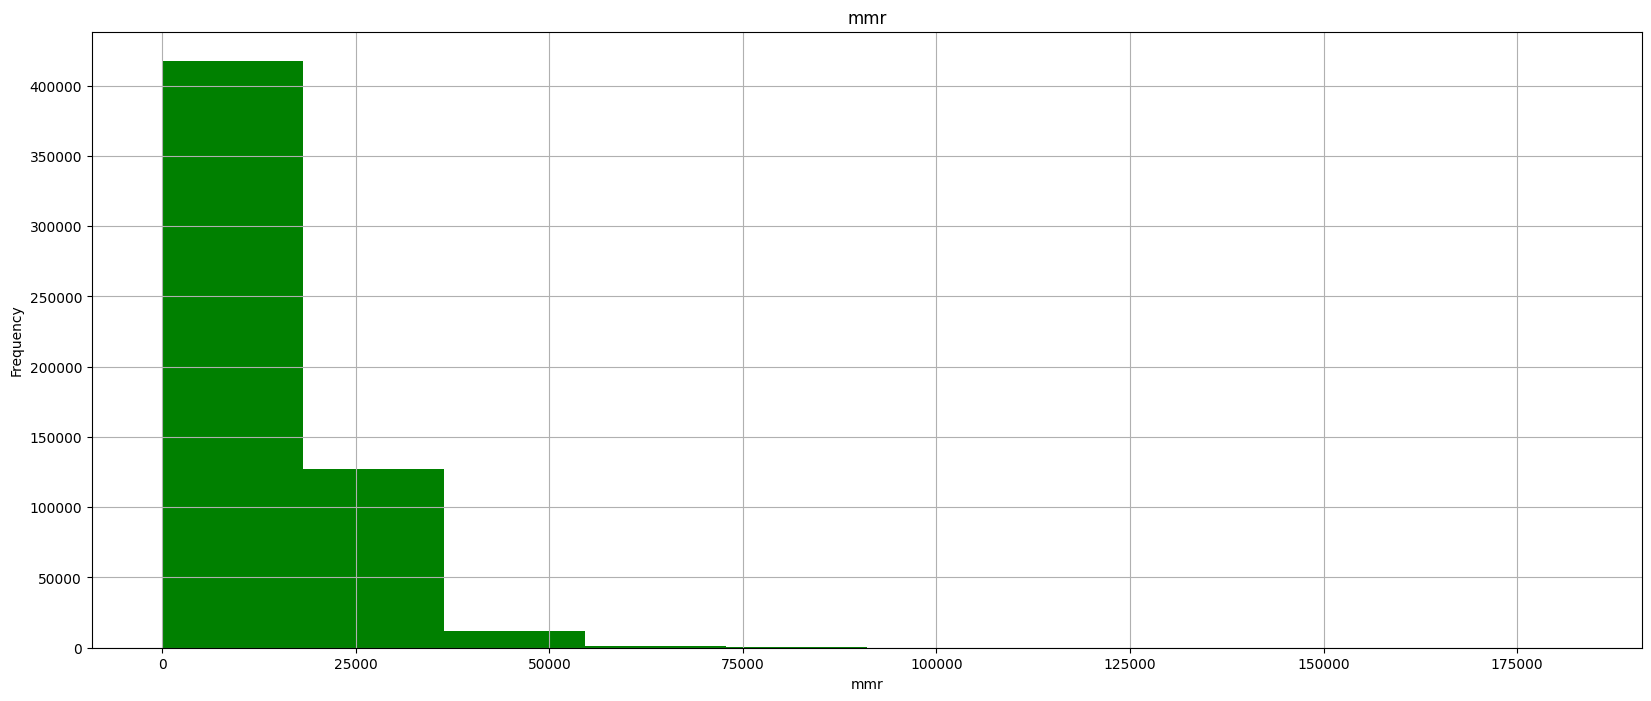

count   558825.000
mean     13611.359
std       9749.502
min          1.000
1%         500.000
5%        1500.000
10%       2800.000
20%       5400.000
30%       8200.000
40%      10300.000
50%      12100.000
60%      14000.000
70%      16700.000
80%      20000.000
90%      25500.000
95%      30600.000
99%      44900.000
100%    230000.000
max     230000.000
Name: sellingprice, dtype: float64
Missing Count: 12
Missing Ratio: 0.00%
##########################################


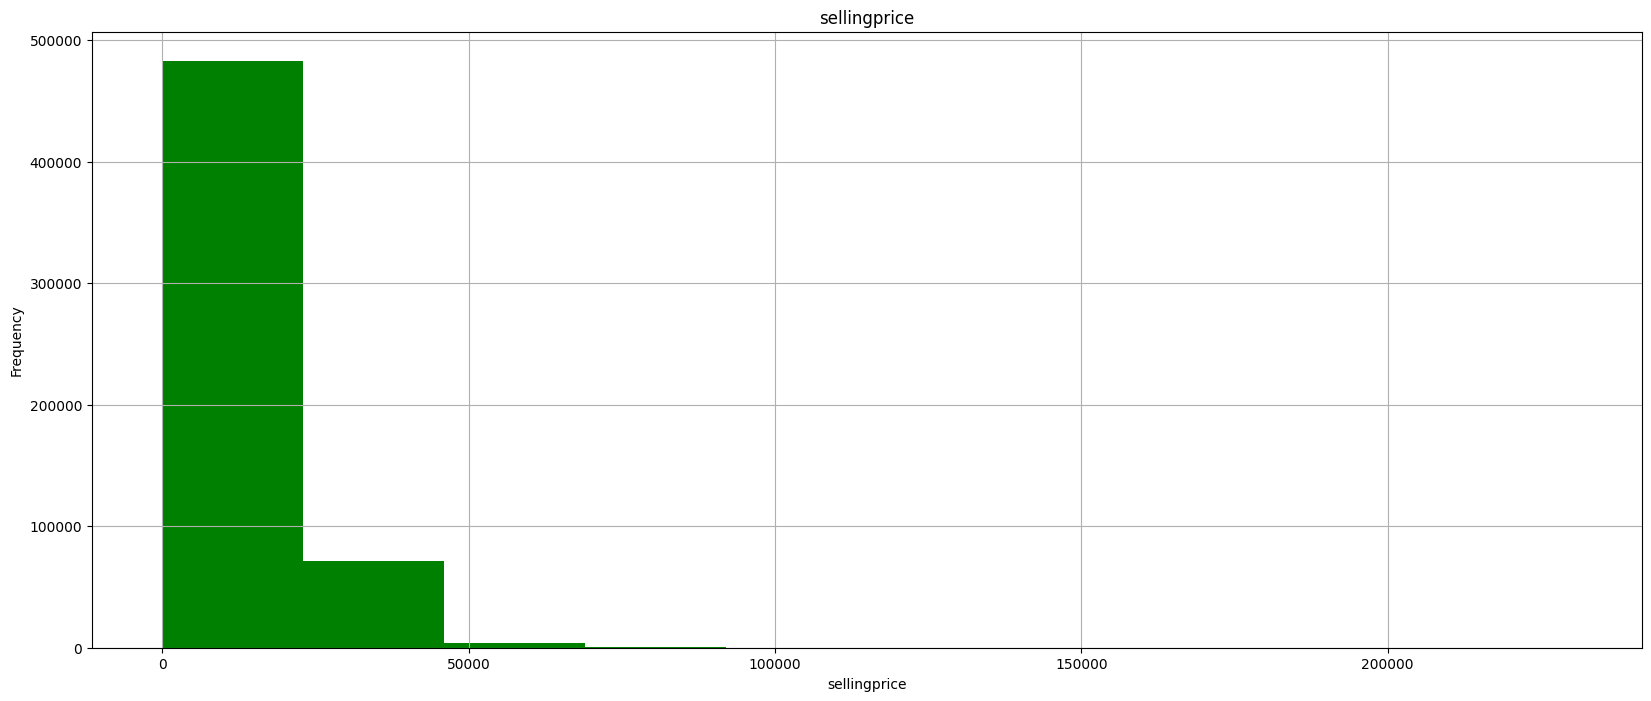

In [64]:
def numSummary(dataframe, numericalCol, plot=False):
    quantiles = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1]
    summary = dataframe[numericalCol].describe(quantiles).T
    
    # Eksik veri sayısı ve oranı
    missing_count = dataframe[numericalCol].isnull().sum()
    missing_ratio = 100 * missing_count / len(dataframe)
    
    print(summary)
    print(f"Missing Count: {missing_count}")
    print(f"Missing Ratio: {missing_ratio:.2f}%")
    print("##########################################")
    
    if plot:
        plt.figure(figsize=(20, 8))
        dataframe[numericalCol].hist(color='green')
        plt.xlabel(numericalCol)
        plt.ylabel("Frequency")
        plt.title(numericalCol)
        plt.show(block=True)

for col in numCols:
    numSummary(df, col, True)

## Grafikleri Yorumlayalım: 

### Year

- Satılan araçların genel olarak 2000 ile 2015 yılları arasındaki model tarihlerine dağıldığı gözlemlenmektedir.

### Condition

- Satılan araçların durum puanlarının  arasındaki  tarihlerine dağıldığı gözlemlenmektedir.

### Odometer

- Satılan araçların yaptığı kilometre değerleri 0 ile 300.000 km arasında dağıldığı gözlemlenmektedir.

### MMR

- Satılan araçların pazar değerlerinin genel olarak 400 ile 44.000 dolar arasında dağıldığı gözlemlenmektedir.

### Selling price 

- Satılan araçların fiyatlarının genel olarak 400 ile 47.000 dolar arasında dağıldığı gözlemlenmektedir.

### Hedef olarak belirlediğimiz bir kategorik değişkenimizi numerik verilerimiz ile inceleyelim.

In [65]:
def targetSummaryWithNum(dataframe, target, numCol):
    # Hedef değişkenin ortalamasını hesapla ve fiyatı en yüksek olandan sırala
    summary_df = dataframe.groupby(target).agg({numCol: "mean"}).sort_values(by=numCol, ascending=False)
    top_10 = summary_df.head(10)
    bottom_10 = summary_df.tail(10)
    print("Top 10:\n", top_10, end="\n\n\n")
    print("Bottom 10:\n", bottom_10, end="\n\n\n")

for col in numCols:
    targetSummaryWithNum(df, "make", col)



Top 10:
                year
make               
Tesla      2013.217
FIAT       2013.163
Ram        2012.785
Kia        2012.093
Fisker     2012.000
airstream  2012.000
smart      2011.556
Hyundai    2011.440
mitsubishi 2011.342
lincoln    2011.103


Bottom 10:
                year
make               
Oldsmobile 2000.596
ford tk    2000.000
chev truck 2000.000
Plymouth   1998.950
oldsmobile 1998.550
plymouth   1998.429
dot        1998.000
ford truck 1997.667
dodge tk   1997.000
Geo        1995.526


Top 10:
               condition
make                   
Lamborghini      43.750
audi             37.800
Ferrari          37.579
smart            37.423
maserati         37.333
Aston Martin     35.920
Porsche          35.361
Infiniti         35.226
Fisker           35.111
Rolls-Royce      35.059


Bottom 10:
             condition
make                 
mercury        17.846
plymouth       17.000
Oldsmobile     16.282
oldsmobile      6.647
Geo             5.895
airstream       4.000
ford tru

### Yıl (Year)
- En yeni araçlar: Tesla (2013.217), FIAT (2013.163), Ram (2012.785) gibi markalar en yeni araçlara sahip.
- En eski araçlar: Oldsmobile (2000.596), Ford Truck (2000.000), Chev Truck (2000.000) gibi markalar en eski araçlara sahip.
### Durum (Condition)
- En iyi durumda olan araçlar: Lamborghini (43.750), Audi (37.800), Ferrari (37.579) gibi markalar en iyi durumda olan araçlara sahip.
- En kötü durumda olan araçlar: Mercury (17.846), Plymouth (17.000), Oldsmobile (16.282) gibi markalar en kötü durumda olan araçlara sahip.
### Kilometre (Odometer)
- En yüksek kilometreye sahip araçlar: Dodge Truck (246997.000), Ford Truck (194084.667), Dot (191734.000) gibi markalar en yüksek kilometreye sahip.
- En düşük kilometreye sahip araçlar: Maserati (29630.737), Smart (28963.500), Aston Martin (26603.640) gibi markalar en düşük kilometreye sahip.
### MMR (Manheim Market Report)
- En yüksek MMR değerine sahip araçlar: Rolls-Royce (154294.118), Ferrari (129210.526), Lamborghini (111500.000) gibi markalar en yüksek MMR değerine sahip.
- En düşük MMR değerine sahip araçlar: Hyundai Truck (1875.000), Isuzu (1750.858), Oldsmobile (1095.055) gibi markalar en düşük MMR değerine sahip.
### Satış Fiyatı (Selling Price)
- En yüksek satış fiyatına sahip araçlar: Rolls-Royce (153488.235), Ferrari (127210.526), Lamborghini (112625.000) gibi markalar en yüksek satış fiyatına sahip.
- En düşük satış fiyatına sahip araçlar: Chev Truck (2000.000), Isuzu (1709.196), Oldsmobile (954.190) gibi markalar en düşük satış fiyatına sahip.

### Hedef olarak belirlediğimiz bir numerik değişkenimizi kategorik verilerimiz ile inceleyelim.

In [66]:
def targetSummaryWithCat(dataframe, target, numCol):
    # Hedef değişkenin ortalamasını hesapla ve fiyatı en yüksek olandan sırala
    summary_df = pd.DataFrame({"TARGET_MEAN": dataframe.groupby(numCol)[target].mean()})
    sorted_summary_df = summary_df.sort_values(by="TARGET_MEAN", ascending=False).head(10)
    print(sorted_summary_df, end="\n\n\n")

for col in catCols:
    targetSummaryWithCat(df, "sellingprice", col)


              TARGET_MEAN
make                     
Rolls-Royce    153488.235
Ferrari        127210.526
Lamborghini    112625.000
Bentley         74367.672
airstream       71000.000
Tesla           67054.348
Aston Martin    54812.000
Fisker          46461.111
Maserati        45320.301
Lotus           40800.000


                       TARGET_MEAN
model                             
458 Italia              183000.000
SLS AMG GT              156500.000
i8                      154222.222
Flying Spur             154000.000
Ghost                   153488.235
California              131846.154
SLS AMG                 116016.667
Gallardo                112625.000
Continental GTC Speed   111000.000
F430                    109750.000


                         TARGET_MEAN
body                                
granturismo convertible    79041.667
GranTurismo Convertible    74000.000
CTS-V Wagon                50500.000
cts-v coupe                39707.143
CTS-V Coupe                38425.750
Q60 C

### Marka (Make)
- En yüksek ortalama satış fiyatına sahip markalar: Rolls-Royce (153,488.235), Ferrari (127,210.526), Lamborghini (112,625.000) gibi lüks markalar en yüksek ortalama satış fiyatlarına sahip.
- En düşük ortalama satış fiyatına sahip markalar: Bu verilerde en düşük fiyatlı markalar belirtilmemiş, ancak önceki verilere göre Oldsmobile, Geo gibi markalar daha düşük fiyatlı olabilir.
### Model
- En yüksek ortalama satış fiyatına sahip modeller: 458 Italia (183,000.000), SLS AMG GT (156,500.000), i8 (154,222.222) gibi modeller en yüksek ortalama satış fiyatlarına sahip.
- En düşük ortalama satış fiyatına sahip modeller: Bu verilerde en düşük fiyatlı modeller belirtilmemiş, ancak önceki verilere göre daha düşük fiyatlı modeller olabilir.
### Gövde Tipi (Body)
- En yüksek ortalama satış fiyatına sahip gövde tipleri: Granturismo Convertible (79,041.667), GranTurismo Convertible (74,000.000), CTS-V Wagon (50,500.000) gibi gövde tipleri en yüksek ortalama satış fiyatlarına sahip.
- En düşük ortalama satış fiyatına sahip gövde tipleri: Bu verilerde en düşük fiyatlı gövde tipleri belirtilmemiş, ancak önceki verilere göre daha düşük fiyatlı gövde tipleri olabilir.
### Şanzıman (Transmission)
- En yüksek ortalama satış fiyatına sahip şanzıman tipleri: Sedan (13,686.364), sedan (13,650.000), automatic (13,540.407) gibi şanzıman tipleri en yüksek ortalama satış fiyatlarına sahip.
- En düşük ortalama satış fiyatına sahip şanzıman tipleri: Manual (11,211.448) en düşük ortalama satış fiyatına sahip.
### Eyalet (State)
- En yüksek ortalama satış fiyatına sahip eyaletler: ON (17,812.623), TN (17,009.744), PA (15,976.303) gibi eyaletler en yüksek ortalama satış fiyatlarına sahip.
- En düşük ortalama satış fiyatına sahip eyaletler: OH (14,406.619), MO (14,466.192) gibi eyaletler en düşük ortalama satış fiyatlarına sahip.
### Renk (Color)
- En yüksek ortalama satış fiyatına sahip renkler: Charcoal (16,247.497), black (15,509.005), brown (15,352.808) gibi renkler en yüksek ortalama satış fiyatlarına sahip.
- En düşük ortalama satış fiyatına sahip renkler: 2172 (14,050.000), 721 (14,100.000) gibi renkler en düşük ortalama satış fiyatlarına sahip.
### İç Mekan (Interior)
- En yüksek ortalama satış fiyatına sahip iç mekan renkleri: Off-white (29,045.990), red (23,789.087), brown (20,241.965) gibi iç mekan renkleri en yüksek ortalama satış fiyatlarına sahip.
- En düşük ortalama satış fiyatına sahip iç mekan renkleri: Purple (13,198.086), beige (13,348.511) gibi iç mekan renkleri en düşük ortalama satış fiyatlarına sahip.

## Korelasyon Matrisi

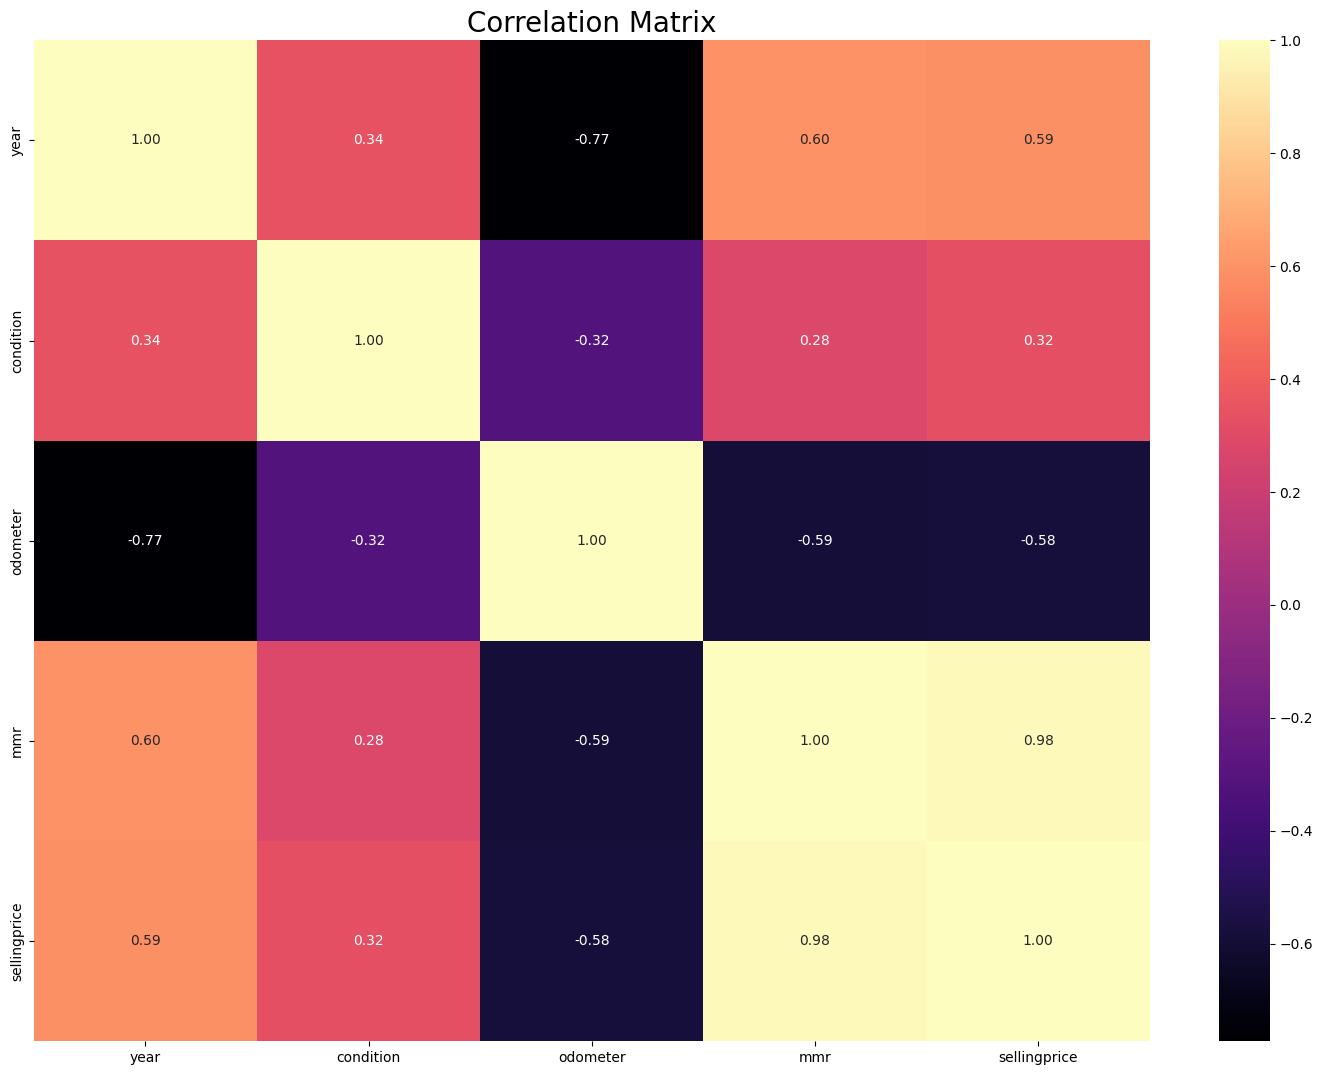

In [67]:
figure, axes = plt.subplots(figsize=[18, 13])
sns.heatmap(df[numCols].corr(), annot=True, fmt=".2f", ax=axes, cmap="magma")
axes.set_title("Correlation Matrix", fontsize=20)
plt.show()

## Korelasyonlar
- Yıl ve Kilometre: Güçlü bir negatif korelasyon (-0.77) vardır, bu da daha yeni arabaların (daha yüksek 'yıl') daha düşük kilometreye (kilometre sayacı) sahip olduğunu gösterir.

- Yıl ve Satış Fiyatı: Orta düzeyde pozitif bir korelasyon (0.59) vardır, bu da daha yeni arabaların daha yüksek satış fiyatına sahip olduğunu gösterir.

- Kilometre ve Satış Fiyatı: Orta düzeyde negatif bir korelasyon (-0.58) vardır, bu da daha yüksek kilometreye sahip arabaların daha düşük satış fiyatına sahip olduğunu gösterir.

- MMR (Manheim Market Report) ve Satış Fiyatı: Çok güçlü bir pozitif korelasyon (0.98) vardır, bu da MMR değerinin satış fiyatının güçlü bir tahmincisi olduğunu gösterir.

- Durum ve Satış Fiyatı: Zayıf bir pozitif korelasyon (0.32) vardır, bu da daha iyi durumda olan arabaların daha yüksek satış fiyatına sahip olduğunu gösterir, ancak ilişki çok güçlü değildir.

- MMR ve Kilometre: Orta düzeyde negatif bir korelasyon (-0.59) vardır, bu da daha yüksek kilometreye sahip arabaların daha düşük MMR değerine sahip olduğunu gösterir.

- Yıl ve MMR: Orta düzeyde pozitif bir korelasyon (0.60) vardır, bu da daha yeni arabaların daha yüksek MMR değerine sahip olduğunu gösterir.

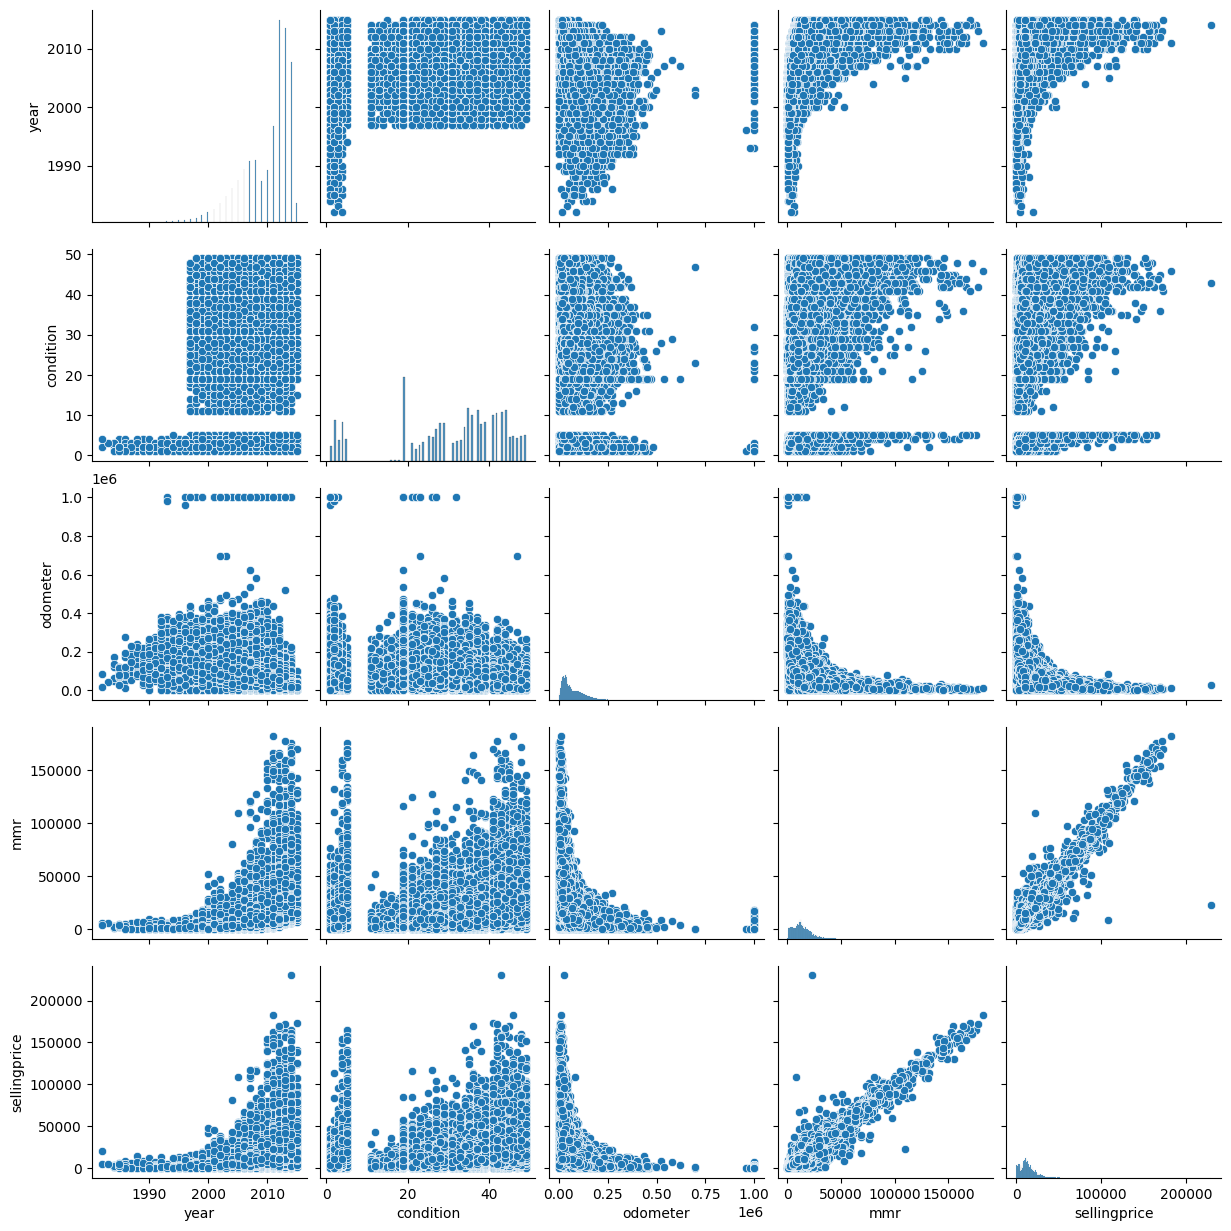

In [68]:
# Seaborn pairplot fonksiyonunu kullanarak çift değişkenli ilişkileri bir ızgara (grid) şeklinde  görselleştirelim.
sns.pairplot(df)


### Dağılımlar

- Yıl: Arabaların çoğu son yıllardan olup, yaklaşık 2000 yılından itibaren keskin bir artış görülmektedir.
- Durum: Durum değişkeni, veri noktalarının çoğu belirli seviyelerde kümelenmiş bazı ayrık değerlere sahip gibi görünmektedir, bu da durumun muhtemelen sıralı bir değişken (örneğin, 1, 2, 3 vb. - durum derecelendirmeleri) olduğunu göstermektedir.
- Kilometre: Dağılım sağa çarpık olup, çoğu aracın kilometresi daha düşüktür. Ancak, bazı araçlar çok yüksek kilometreye sahiptir.
- MMR: MMR değerlerinin dağılımı da sağa çarpık olup, daha düşük MMR değerlerine sahip arabaların sıklığı daha yüksektir.
- Satış Fiyatı: MMR'ye benzer şekilde, satış fiyatı dağılımı sağa çarpık olup, çoğu arabanın satış fiyatı daha düşüktür.

### İlişkiler 

- Yıl ve Kilometre: Burada açık bir negatif ilişki vardır. Daha yeni arabalar (daha yüksek 'yıl') daha düşük kilometreye sahip olma eğilimindedir. Bu, korelasyon matrisinde görülen güçlü negatif - korelasyonla uyumludur.
- Yıl ve Satış Fiyatı: Daha yeni arabaların daha yüksek satış fiyatlarına sahip olma eğilimi gösteren pozitif bir ilişki vardır. Bu, daha önce gözlemlenen pozitif korelasyonla tutarlıdır.
- Yıl ve MMR: Satış fiyatına benzer şekilde, daha yeni arabaların daha yüksek MMR değerlerine sahip olma eğilimi vardır.
- Durum ve Satış Fiyatı: Pozitif bir eğilim olsa da, dağılım, aynı durum derecesine sahip arabalar için satış fiyatlarında büyük bir değişkenlik olduğunu göstermektedir.
- Kilometre ve Satış Fiyatı: Daha yüksek kilometreye sahip arabaların daha düşük satış fiyatlarına sahip olma eğilimi gösteren açık bir negatif ilişki vardır. Ancak, bu ilişki doğrusal değil gibi görünüyor.
- MMR ve Satış Fiyatı: Çok güçlü bir pozitif doğrusal ilişki vardır, bu da MMR'nin satış fiyatının güçlü bir tahmincisi olduğunu doğrulamaktadır.
- Kilometre ve MMR: Satış fiyatıyla olan ilişkiye benzer şekilde, daha yüksek kilometreye sahip arabaların daha düşük MMR değerlerine sahip olduğu negatif bir ilişki vardır.

### Özet

- Satış Fiyatı için Güçlü Tahminciler: MMR, satış fiyatıyla en güçlü ve en doğrusal ilişkiye sahip olup, çok iyi bir tahminci haline gelmektedir. Yıl ve kilometre de önemli ilişkiler göstermektedir, ancak daha az güçlü ve doğrusal değildir.
- Dağılımlar: Hem satış fiyatı hem de MMR sağa çarpık olup, veri setindeki düşük fiyatlı araçların yüksek fiyatlı araçlardan daha fazla olduğunu göstermektedir.
- Değişken İlişkileri: Dağılım çizimleri, daha önce görülen korelasyonları doğrulayarak hem doğrusal hem de doğrusal olmayan ilişkileri vurgulamaktadır.

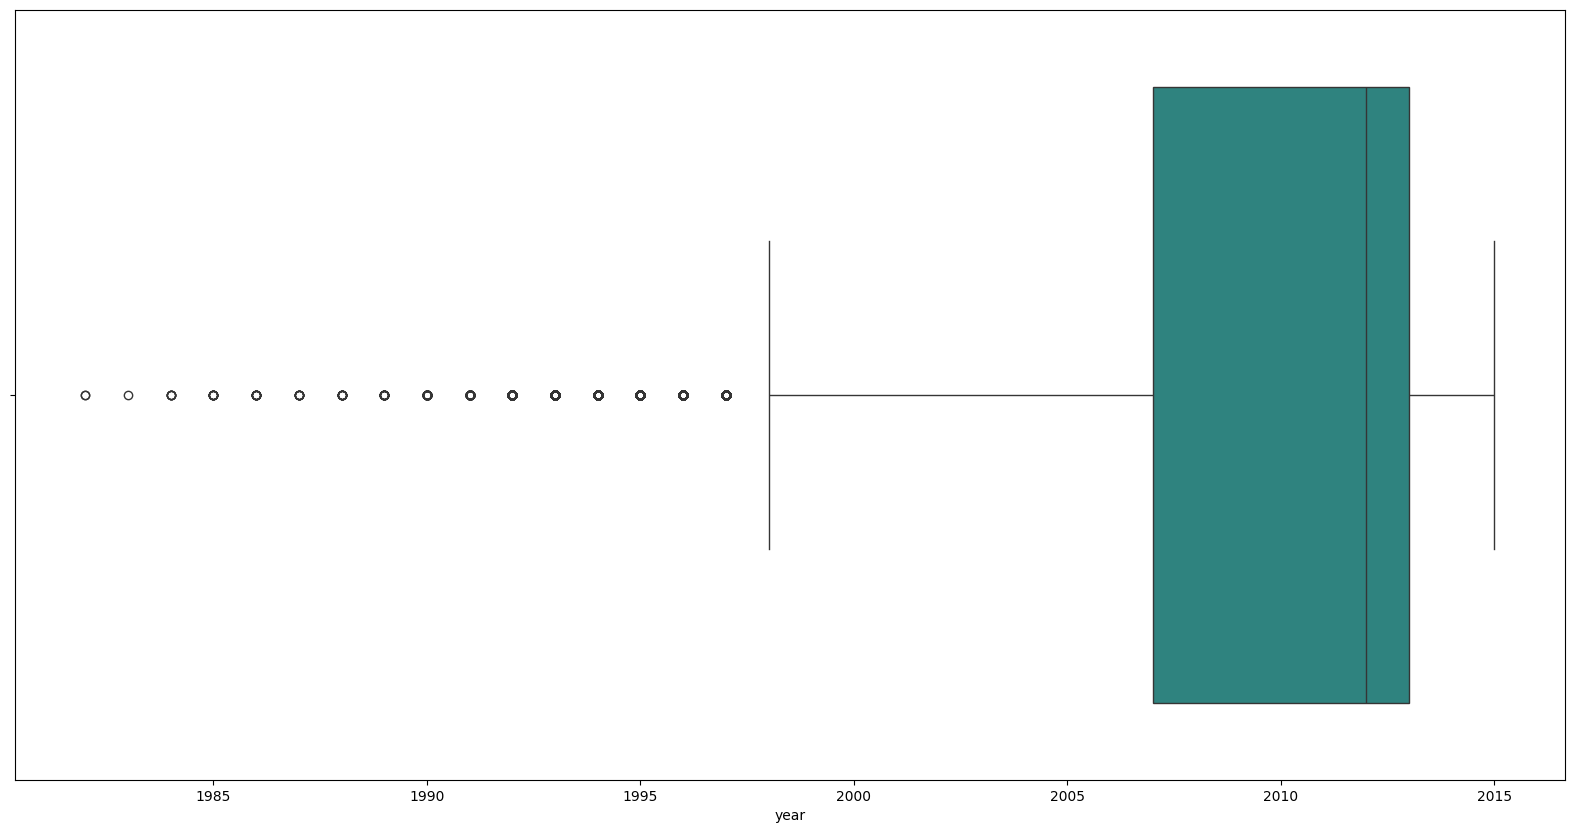

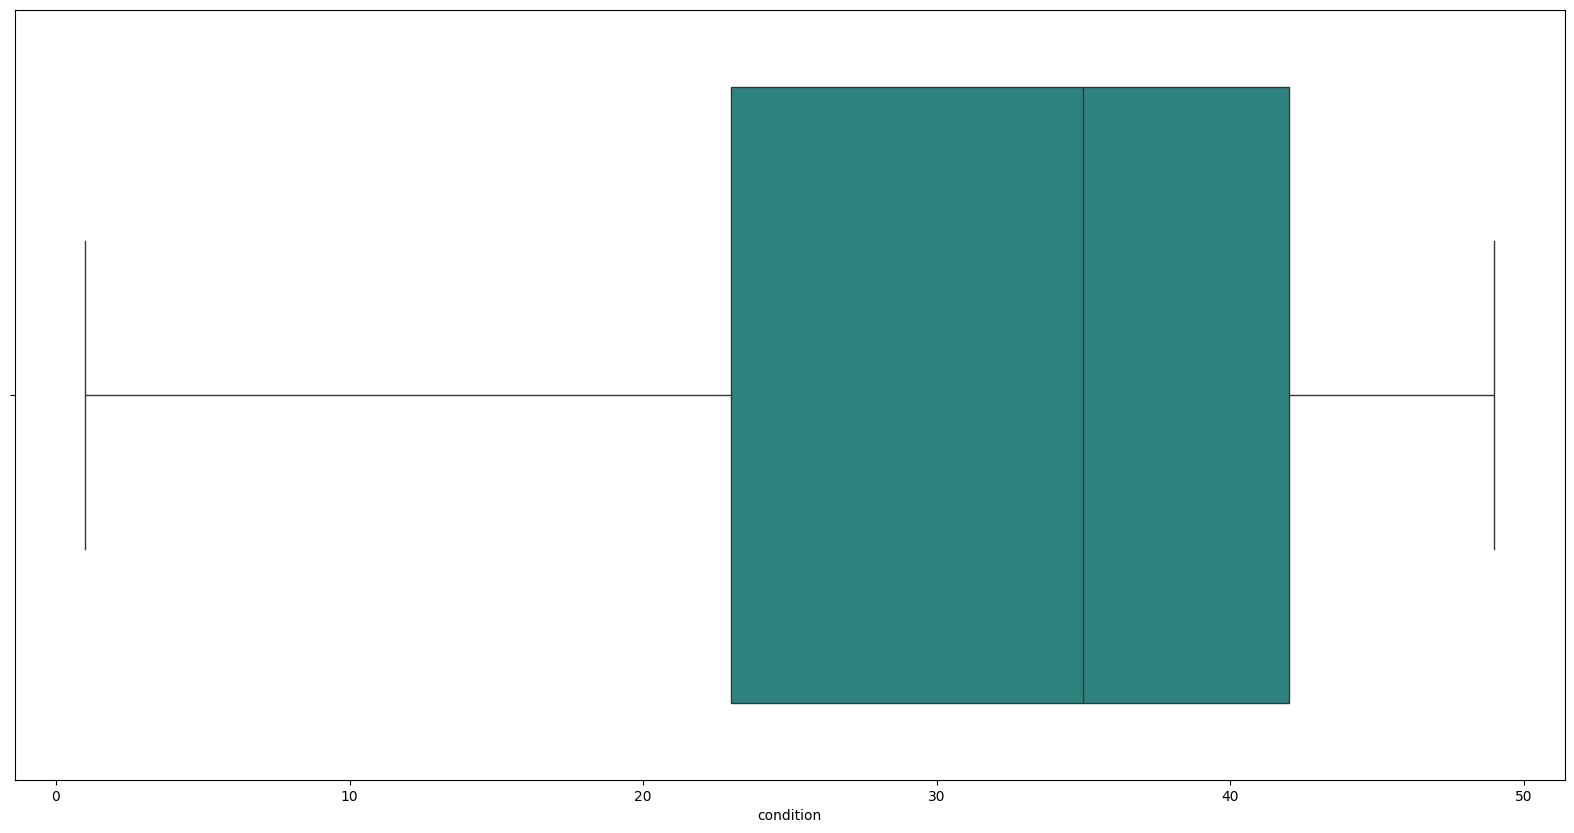

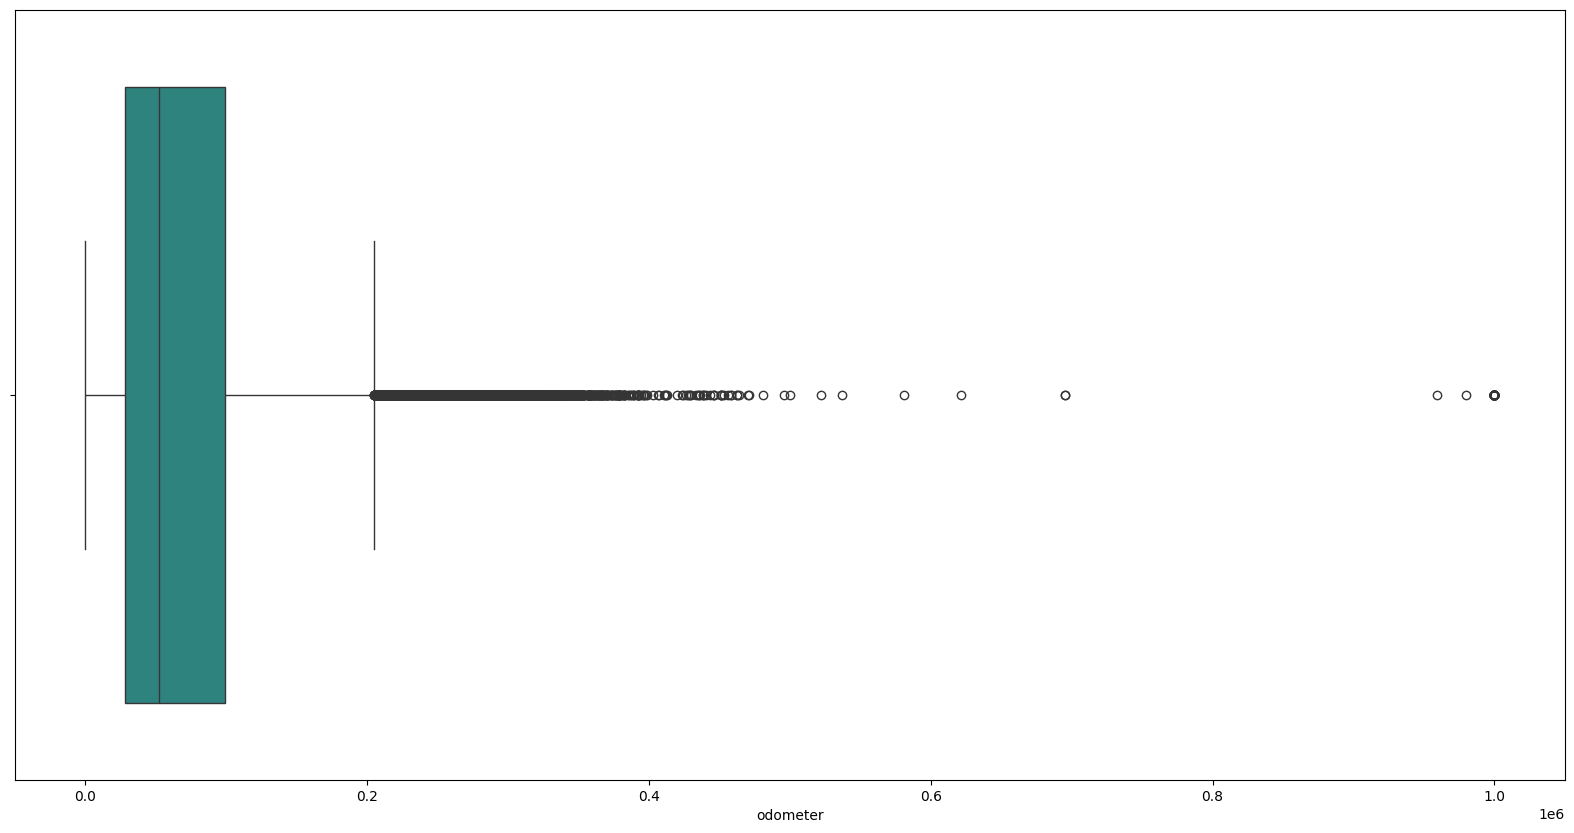

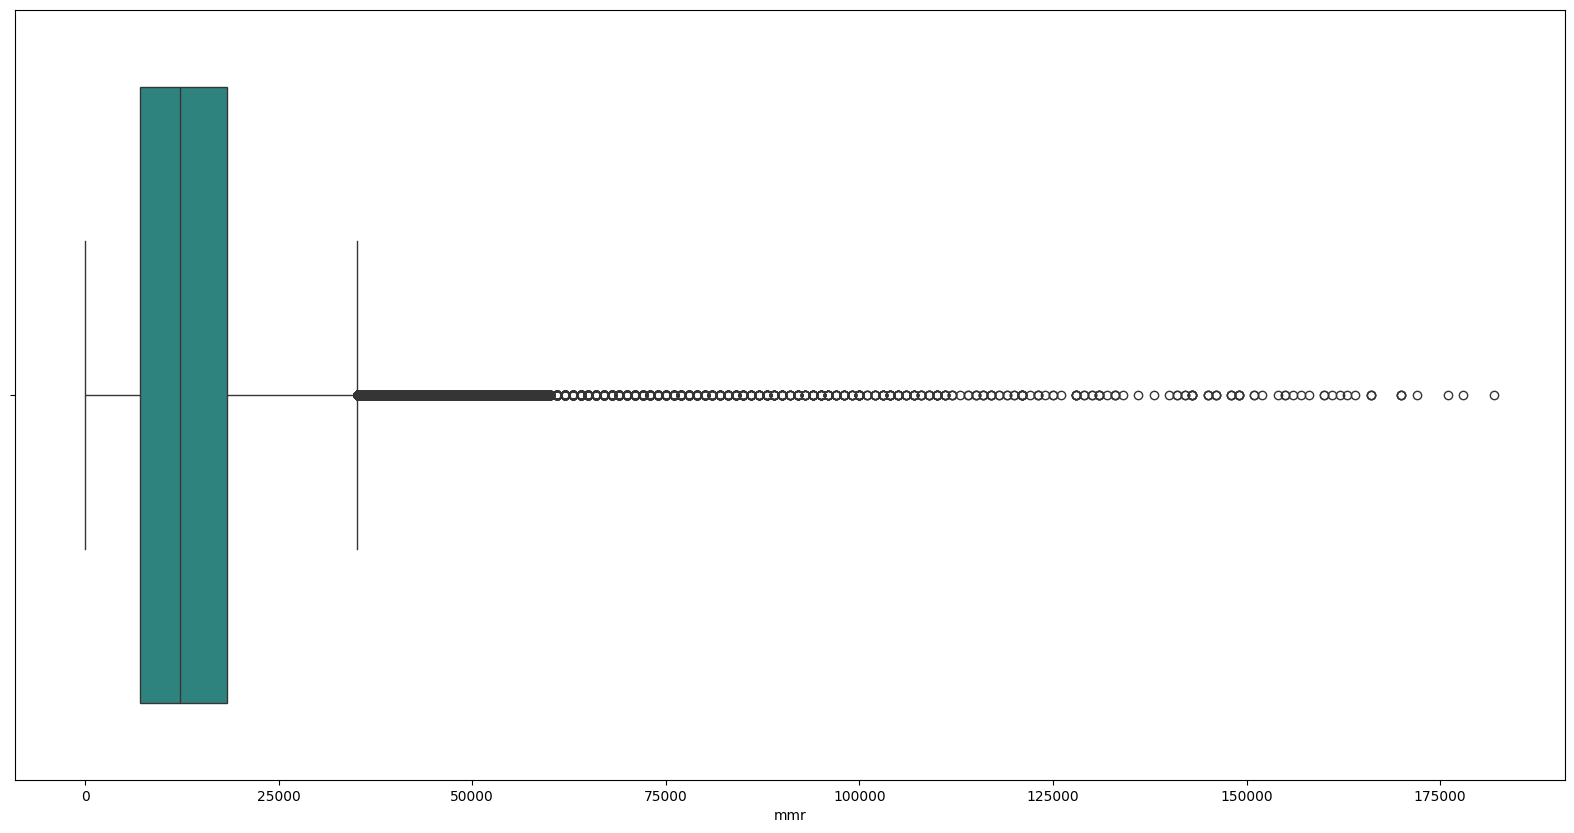

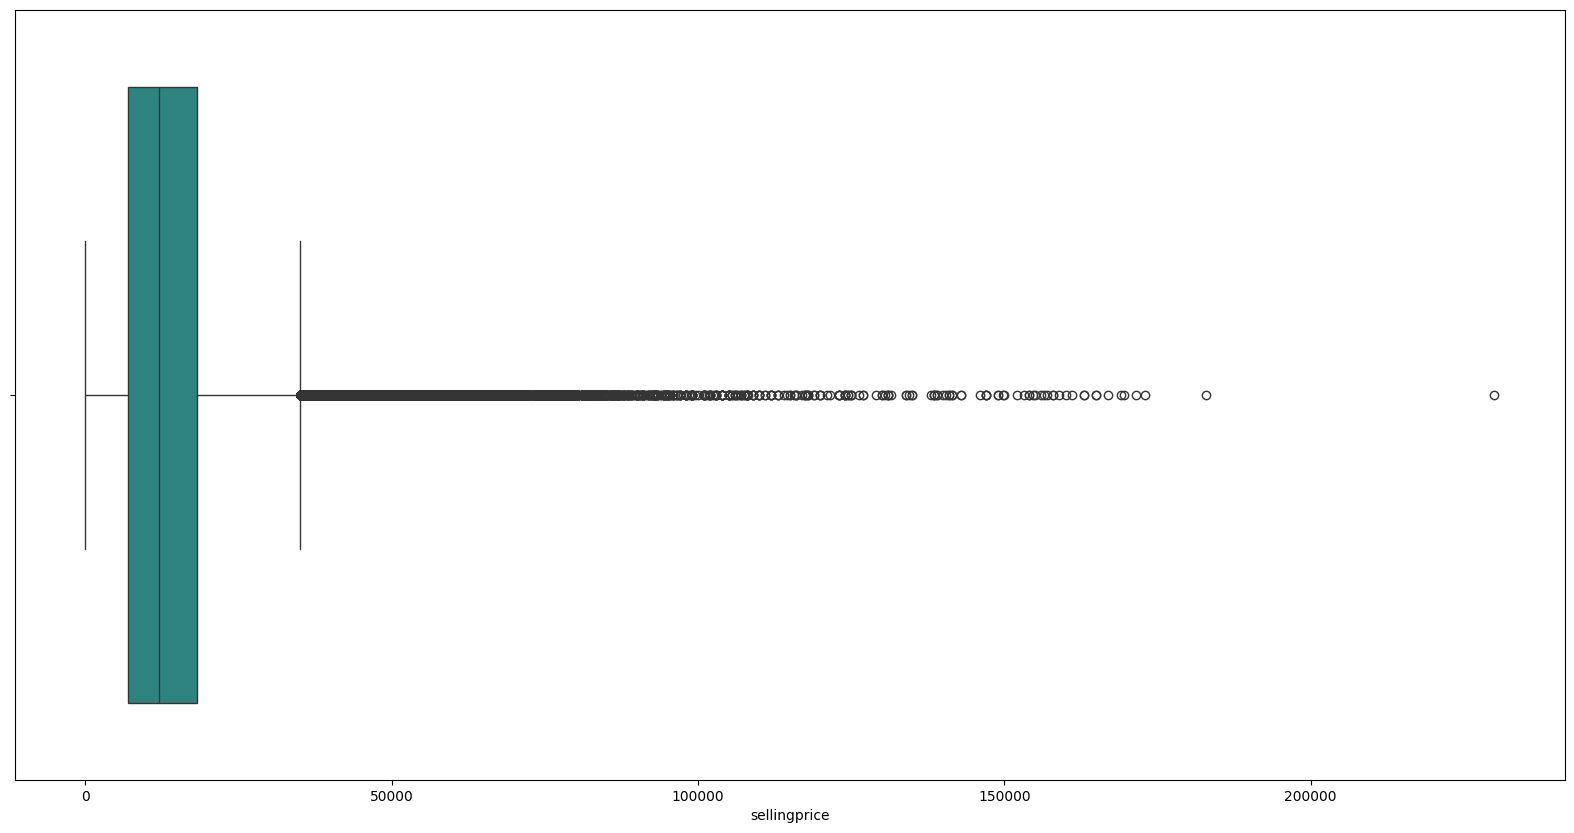

In [69]:
# Boxplot kullanarak aykırı değerleri görselleştirelim.
for i in df.select_dtypes(include = "number").columns:
    plt.figure(figsize = (20,10))
    sns.boxplot(data = df, x = i, palette="viridis")
    plt.show()

## Grafikleri yorumlayalım:
### Condition değişkeni hariç diğer değişkenlerde aykırı değerlerin fazla olduğunu görüyoruz.

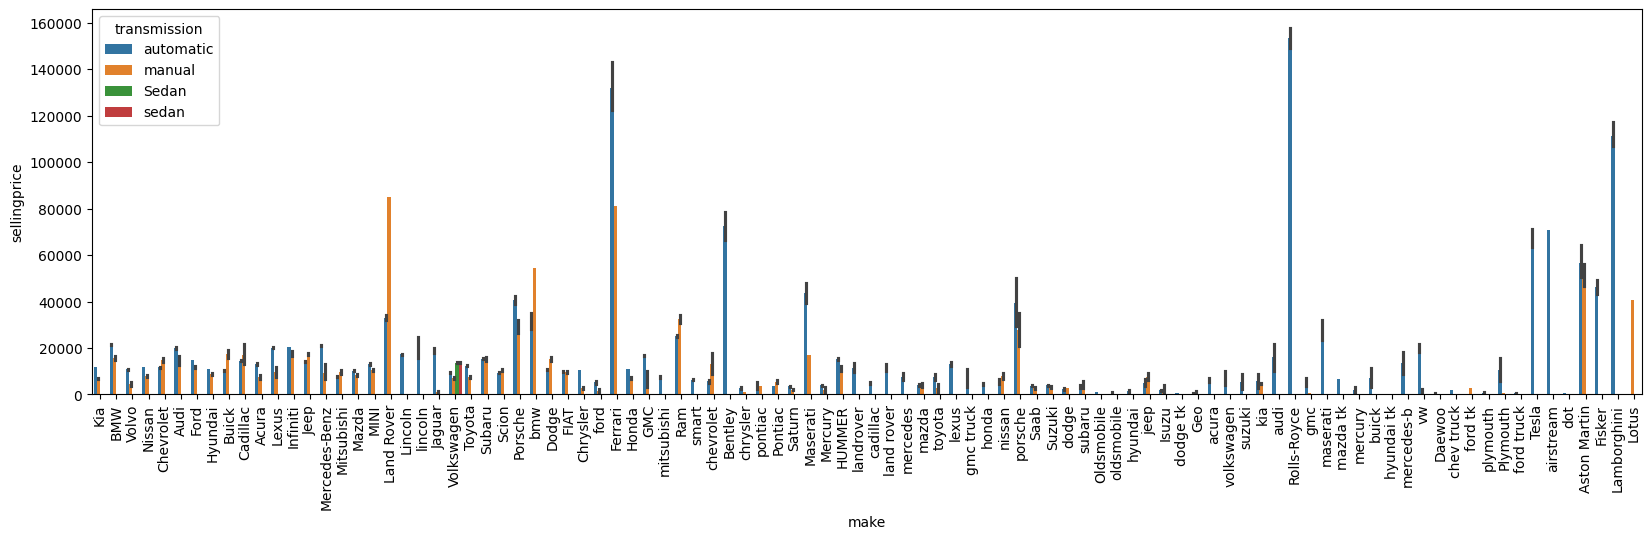

In [70]:
fig, ax = plt.subplots(figsize=[20, 5])
sns.barplot(x='make', y='sellingprice', hue='transmission', data=df, ax=ax)
plt.xticks(rotation=90)
plt.show()

### Genel olarak resime bakınca otomatik vites araçların daha yüksek satış fiyatı olduğu görülüyor ancak bazı araçların manuel fiyatı yüksek burada yanlış bir veri olabilir veya aykırı olarak ele alıbiliriz.

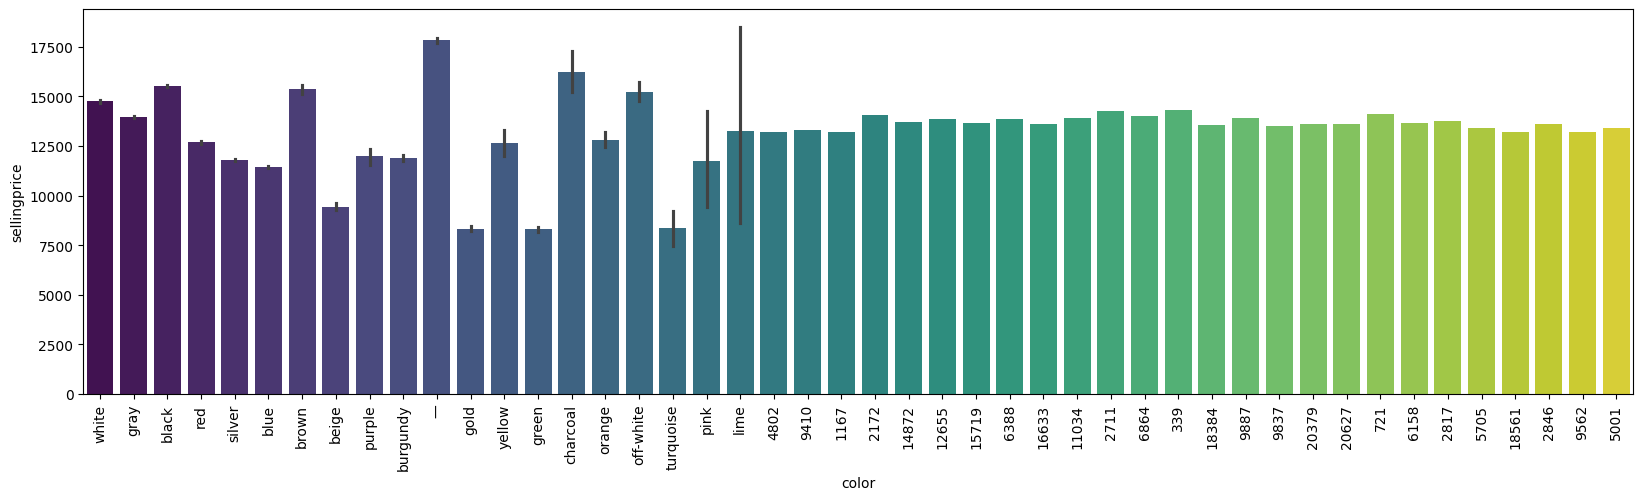

In [71]:
fig, ax = plt.subplots(figsize=[20, 5])
sns.barplot(x='color', y='sellingprice', data=df, ax=ax, palette='viridis', estimator=np.mean)
plt.xticks(rotation=90)
plt.show()

### Araçların satışında dış renklere göre fiyat farklılığı fazla olmadığı görülüyor. Renklere göre fiyatlar düzgün dağılmış diyebiliriz. 

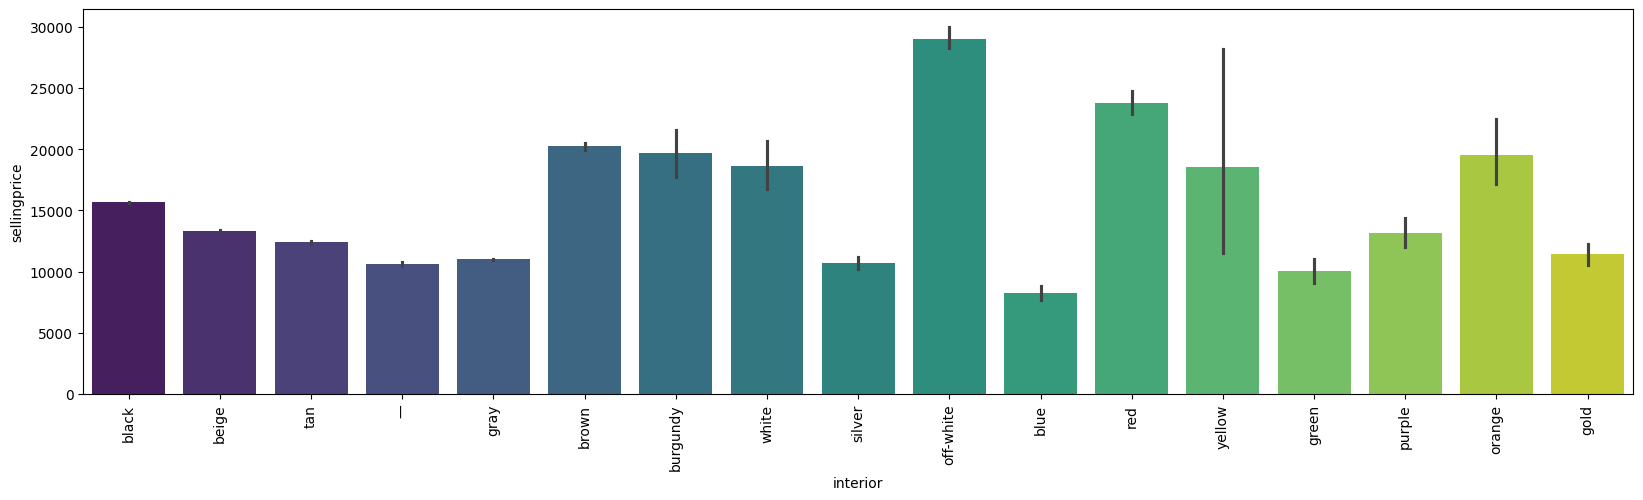

In [72]:
fig, ax = plt.subplots(figsize=[20, 5])
sns.barplot(x='interior', y='sellingprice',  data=df, ax=ax, palette='viridis', estimator=np.mean)
plt.xticks(rotation=90)
plt.show()

### Araçların satışında iç renklere göre fiyat farklılığında dalgalanmalar görülüyor. Renklere göre fiyatlar normal dağılmış diyebiliriz. 

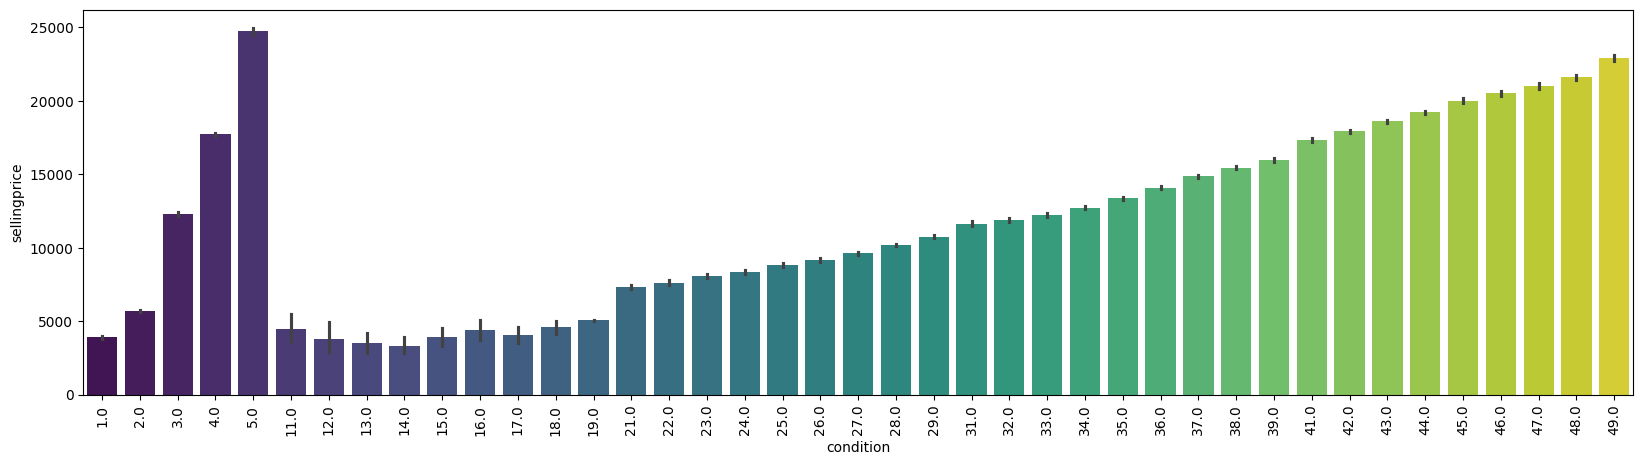

In [73]:
fig, ax = plt.subplots(figsize=[20, 5])
sns.barplot(x='condition', y='sellingprice', data=df, ax=ax, palette="viridis", estimator=np.mean)
plt.xticks(rotation=90)
plt.show()

### Grafiğe bakınca iki farklı sınıflandırma olduğunu görüyorum 1-5 arası ve 10-50 arası iki sınıftada üst değere yakın olanlar yüksek satış fiyatına sahip diyebiliriz.  

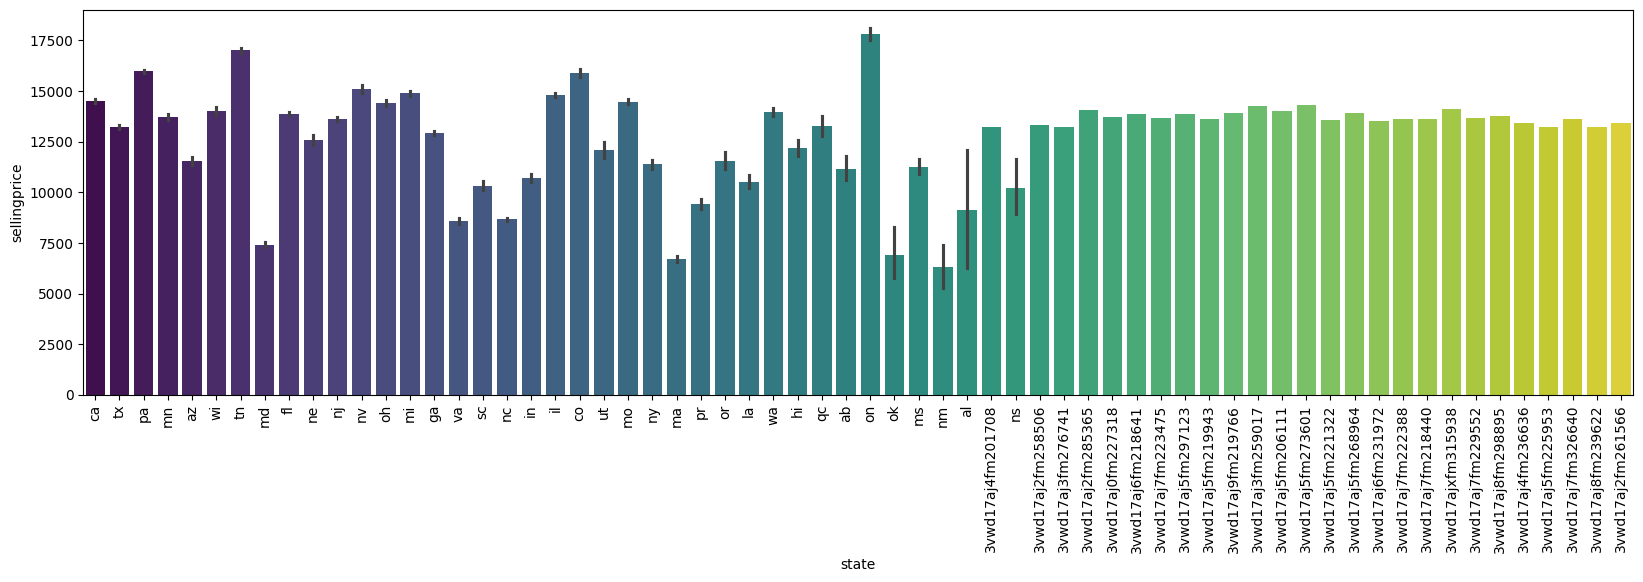

In [74]:
fig, ax = plt.subplots(figsize=[20, 5])
sns.barplot(x='state', y='sellingprice', data=df, ax=ax, estimator=np.mean, palette='viridis')
plt.xticks(rotation=90)
plt.show()

### Genel olarak baktığımızda eyaletler arası pek bir fiyat farkı yok gibi. Düzgün dağılmış diyebiliriz. 

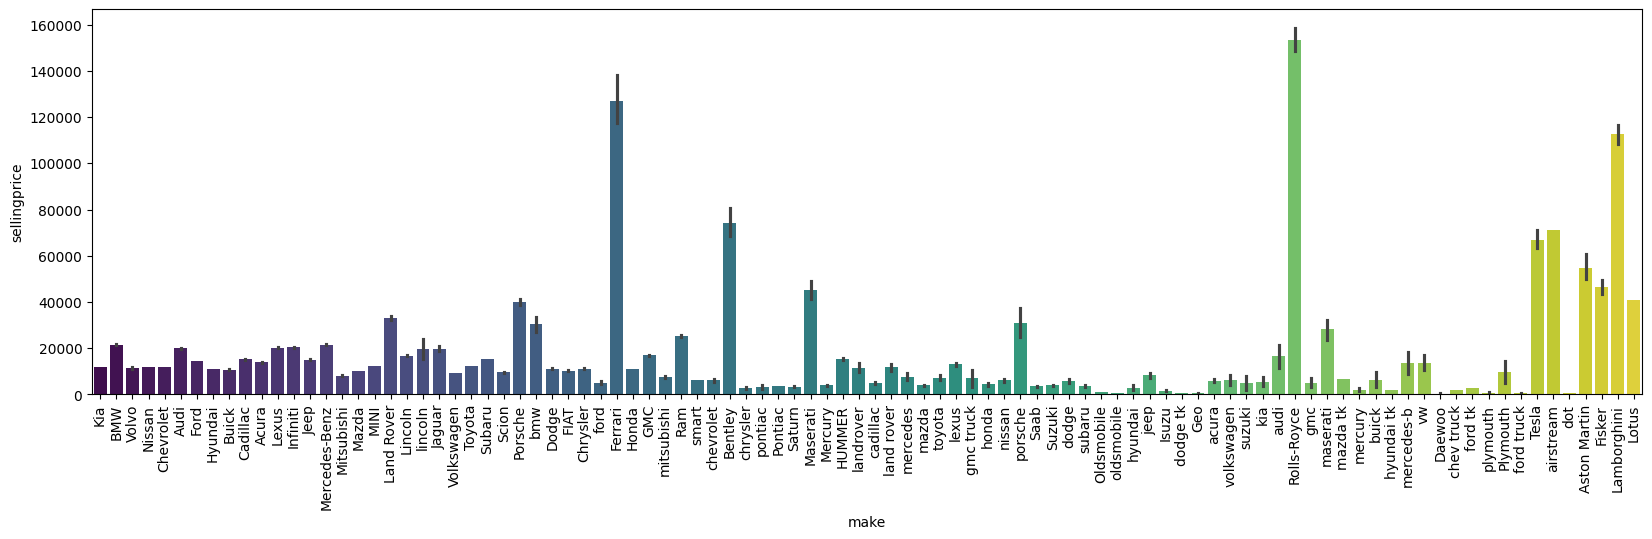

In [75]:
fig, ax = plt.subplots(figsize=[20, 5])
sns.barplot(x='make', y='sellingprice', data=df, ax=ax, estimator=np.mean, palette='viridis')
plt.xticks(rotation=90)
plt.show()

### Fiyatların çoğu 20.000 doların altında. Coğunluğun az bir kısmı 20.000 doların üzerinde.

# Aykırı Gözlem Analizi 

In [76]:
# Aykırı değerlerin baskılanması
def outlierThresholds(dataframe, variable, lowQuantile=0.10, upQuantile=0.90):
    quantileOne = dataframe[variable].quantile(lowQuantile)
    quantileThree = dataframe[variable].quantile(upQuantile)
    interquantile_range = quantileThree - quantileOne
    upLimit = quantileThree + 1.5 * interquantile_range
    lowLimit = quantileOne - 1.5 * interquantile_range
    return lowLimit, upLimit

# Aykırı değer kontrolü


def checkOutlier(dataframe, col_name):
    lowLimit, upLimit = outlierThresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > upLimit) | (dataframe[col_name] < lowLimit)].any(axis=None):
        return True
    else:
        return False

# Aykırı değerlerin baskılanması


def replaceWithThresholds(dataframe, variable):
    lowLimit, upLimit = outlierThresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < lowLimit), variable] = lowLimit
    dataframe.loc[(dataframe[variable] > upLimit), variable] = upLimit


In [77]:
for col in numCols:
    if col != "Sellingprice":
        print(col, checkOutlier(df, col))

year True
condition False
odometer True
mmr True
sellingprice True


### Condition değişkeni hariç aykırı değerlere rastladık. 

### Fonksiyon ile önceden belirlediğimiz alt ve üst limitler ile aykırı değerlerden kurtulalım.

In [78]:
for col in numCols:
    if col != "Sellingprice":
        replaceWithThresholds(df, col)

In [79]:
for col in numCols:
    if col != "Sellingprice":
        print(col, checkOutlier(df, col))

year False
condition False
odometer False
mmr False
sellingprice False


### Aykırı değerlerin baskıladık

# Yanlış ve az bilgi içeren sütunları silelim

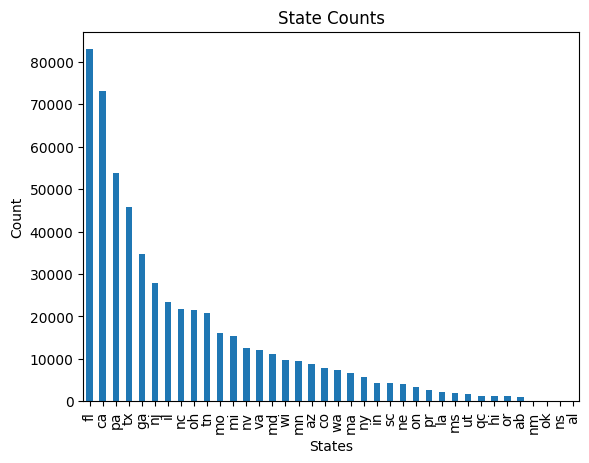

In [80]:
df = df[df['state'].apply(lambda x: len(x) <= 3)]
state_counts = df['state'].value_counts()
state_counts.plot(kind='bar')
plt.title('State Counts')
plt.xlabel('States')
plt.ylabel('Count')
plt.show()

### Tuhaf isimlendirilmiş eyaletleri sayıları çok az olduğu için sildik. Daha temiz ve okunur veri elde ettik.

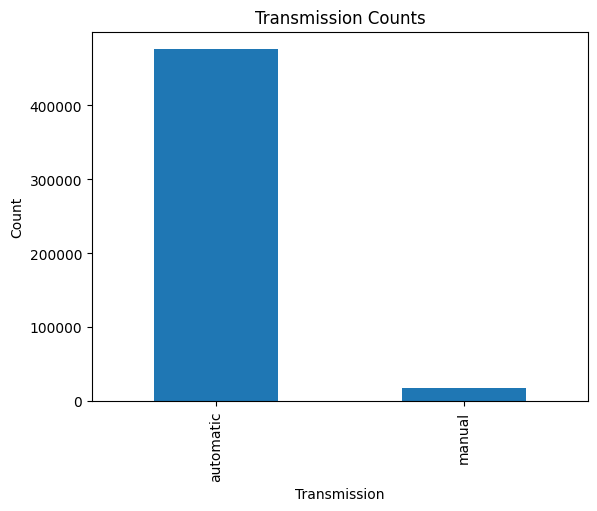

In [82]:
df = df[~df['transmission'].str.lower().isin(['sedan'])]
state_counts = df['transmission'].value_counts()
state_counts.plot(kind='bar')
plt.title('Transmission Counts')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.show()


### Sedan olarak isimlendirilmiş vites sınıfları sildik.

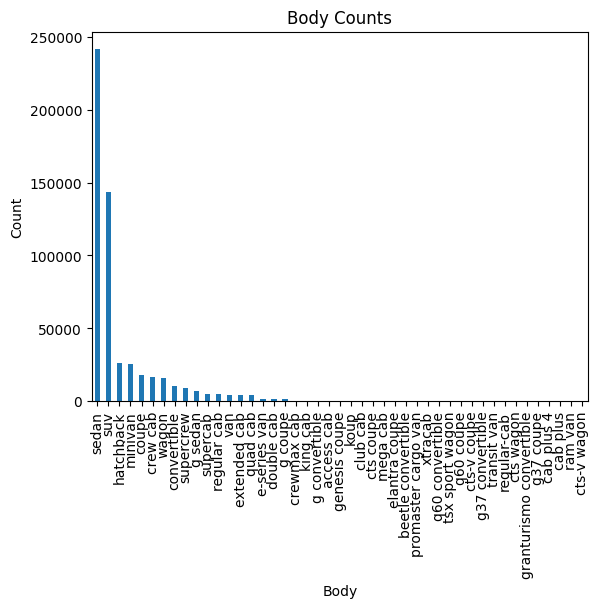

In [86]:
df['body'] = df['body'].str.lower()
state_counts = df['body'].value_counts()
state_counts.plot(kind='bar')
plt.title('Body Counts')
plt.xlabel('Body')
plt.ylabel('Count')
plt.show()

### Body değişkeninde tüm sınıfları küçük harfe çevirdik böylece aynı sınıfa ait olan veriler tekrarlamamış oldu.

In [99]:
df['trim'] = df['trim'].str.lower()
state_counts = df['trim'].value_counts()


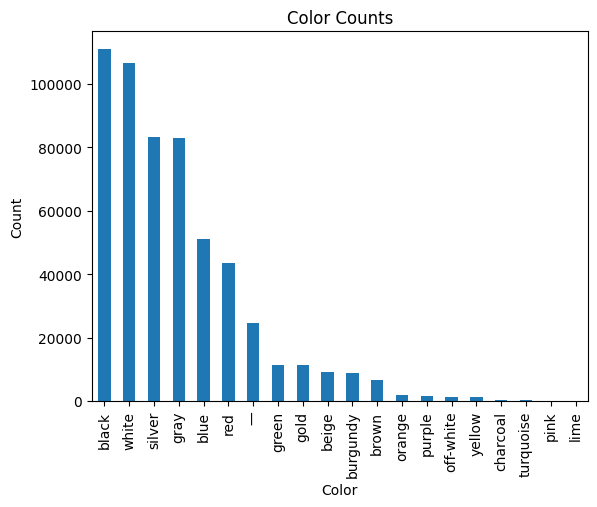

In [88]:
def is_numeric(value):
    try:
        float(value)  
        return True
    except ValueError:
        return False

df = df[~df['color'].apply(is_numeric)]
state_counts = df['color'].value_counts()
state_counts.plot(kind='bar')
plt.title('Color Counts')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

### Renklerin sayısal karsılıkları belli olmadığı için sildik.

In [97]:
df['color'] = df['color'].replace('—', 'unknown')
class_counts = df['color'].value_counts()
class_counts

color
black        110970
white        106673
silver        83389
gray          82857
blue          51139
red           43569
unknown       24685
green         11382
gold          11342
beige          9222
burgundy       8972
brown          6717
orange         2078
purple         1561
off-white      1449
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
Name: count, dtype: int64

### - ile isimlendirilmiş sınıfı unknown olarak güncelledik.

In [98]:
df['interior'] = df['interior'].replace('—', 'unknown')
class_counts = df['interior'].value_counts()
class_counts

interior
black        244325
gray         178578
beige         59758
tan           44093
unknown       17076
brown          8640
red            1359
blue           1138
silver         1099
off-white       480
purple          339
gold            324
white           252
green           245
burgundy        191
orange          145
yellow           20
Name: count, dtype: int64

### Aynı işlemi iç renk için de yaptık.

# Eksik Değer Analizi

In [81]:
def missingValuesTable(dataframe, naName=False):
    naColums = [
        col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    nMiss = dataframe[naColums].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[naColums].isnull().sum() /
             dataframe.shape[0] * 100).sort_values(ascending=False)
    missingDf = pd.concat([nMiss, np.round(ratio, 2)],
                          axis=1, keys=['n_miss', 'ratio'])
    print(missingDf, end='\n')
    if naName:
        return naColums


missingValuesTable(df)


              n_miss  ratio
transmission   65352 11.690
body           13195  2.360
condition      11794  2.110
trim           10651  1.910
model          10399  1.860
make           10301  1.840
color            749  0.130
interior         749  0.130
odometer          94  0.020
mmr               12  0.000
sellingprice      12  0.000
saledate          12  0.000


### Eksik değerlerin oranını elde ettik en çok tranmission verisinde eksik var. 